University: NOVA Information Management School <br>
Program: Master’s Degree Program in Data Science and Advanced Analytics <br>
Academic Year: 2022/2023<br>
Group 17  <br>
========================Students========================= <br>
Iryna Savchuk (m20211310@novaims.unl.pt) <br>
Cátia Parrinha (m20201320@novaims.unl.pt) <br>
==========================================================<br>

**Table of Contents** <br>
* [1.Data Import](#librariesimport)
* [2.Data for 36 combination of GAs](#dataimport)
    * [2.1. Loading output](#loadoutput)
    * [2.2 Calculating ABF(Average Best Fitness)](#abf)
    * [2.3 Calculating Standard Deviations](#std)
* [3.Visualizing Results for different GA Configutation](#visualizing)
    * [3.1. Line Plot](#lineplot)
        * [3.1.1. By Selection type](#selection)
            * [3.1.1.1 Fitness Proportionate Selection](#fps)
            * [3.1.1.2 Tournament Selection - size 2](#tourn2)
            * [3.1.1.3 Tournament Selection - size 4](#tourn4)
        * [3.1.2. By Crossover type](#crossover)
            * [3.1.2.1 Single Point Crossover](#singlexo)
            * [3.1.2.2 Arithmetic Crossover](#arithmeticxo)
            * [3.1.2.3 Uniform Crossover](#uniformxo)
        * [3.1.3. By Mutation type](#mutation)
            * [3.1.3.1 Inversion Mutation](#inversionmu)
            * [3.1.3.2 Arithmetic Mutation](#arithmeticmu)
    * [3.2. Line Plot with standard Desviation](#lineplotstd)
    * [3.3. BoxPlot for each configuration](#boxplot)
        * [3.3.1. By Selection type](#boxplotselection)
            * [3.3.1.1 Fitness Proportionate Selection](#boxplotfps)
            * [3.3.1.2 Tournament Selection - size 2](#boxplottourn2)
            * [3.3.1.3 Tournament Selection - size 4](#boxplottourn4)
        * [3.3.2. By Crossover type](#boxplotcrossover)
            * [3.3.2.1 Single Point Crossover](#boxplotsinglexo)
            * [3.3.2.2 Arithmetic Crossover](#boxplotarithmeticxo)
            * [3.3.2.3 Uniform Crossover](#boxplotuniformxo)
        * [3.3.3. By Mutation type](#boxplotmutation)
            * [3.3.3.1 Inversion Mutation](#boxplotinversionmu)
            * [3.3.3.2 Arithmetic Mutation](#boxplotarithmeticmu)
    * [3.4. BoxPlot for Comparison of Parameters](#boxplotparameters)
* [4. Data from the final Results](#finalresults)
    * [4.1 Loading data](#loadfinaloutput)
    * [4.2 Calculating ABF(Average Best Fitness)](#abffinal)
    * [4.3 Calculating Standard Deviations](#stdfinal)
* [5.Visualizing Final Results for different GA Configutation](#visualizingfinal)
    * [5.1. Line Plot](#lineplotfinal)
    * [5.2. Line Plot with standard Desviation](#lineplotstdfinal)
    * [5.3. BoxPlot for each configuration](#boxplotfinal)
    * [5.4. Boxplot across different generations](#boxplotgenfinal)
</a>

# Analysis of the Results

<hr>
<a class="anchor" id="librariesimport">

## 1. Importing Libraries
    
</a>

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

<hr>
<a class="anchor" id="dataimport">

## 2. Data for 36 combination of GAs
    
</a>

<hr>
<a class="anchor" id="loadoutput">

### 2.1 Loading data
    
</a>

In [3]:
# Loading output of GA algorithms from file
file_path = "output/total_runs.csv"
results_df = pd.read_csv(file_path)
#Check the results
results_df.head()

,run_number,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,best_fitness_lst
0,1,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mut,0.9,0.1,4.0,"[0.520966649055481, 0.8256333470344543, 0.8726..."
1,2,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mut,0.9,0.1,4.0,"[0.6210333108901978, 0.7003833055496216, 0.711..."
2,3,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mut,0.9,0.1,4.0,"[0.8732666373252869, 0.8732666373252869, 0.888..."
3,4,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mut,0.9,0.1,4.0,"[0.8491833209991455, 0.8716833591461182, 0.871..."
4,5,10,20,20,tournament_sel,arithmetic_xo,arithmetic_mut,0.9,0.1,4.0,"[0.5286833047866821, 0.5286833047866821, 0.550..."


In [4]:
# Filling NaN values for 'torun_size' with "n/a" (will be useful for further grouping)
results_df = results_df.fillna({'tourn_size': 'n/a'})

# Convert string representation of arrays to actual arrays
results_df['best_fitness_lst'] = results_df['best_fitness_lst'].str.strip('[]').str.split(',').apply(lambda x: [float(val) for val in x])

<hr>
<a class="anchor" id="abf">

### 2.2 Calculating ABF(Average Best Fitness)
    
</a>

In [5]:
############## CALCULATING ABF ##############

# Grouping runs of a certain configuration
configuration_columns = ["total_runs", "pop_size", "gens", "select", "crossover", "mutate", 
                         "xo_prob", "mut_prob", "tourn_size"]

# Group by the specified columns and calculate the mean values of arrays
grouped_ave = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.mean(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result = grouped_ave.reset_index()
result = result.rename(columns={'best_fitness_lst': 'ABF'})

result.head()

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF
0,10,20,20,fps,arithmetic_xo,arithmetic_mut,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648..."
1,10,20,20,fps,arithmetic_xo,arithmetic_mut,0.9,0.3,n/a,"[0.7234149992465972, 0.7786816656589508, 0.784..."
2,10,20,20,fps,arithmetic_xo,inversion_mut,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763..."
3,10,20,20,fps,arithmetic_xo,inversion_mut,0.9,0.3,n/a,"[0.6325333267450333, 0.6985766589641571, 0.781..."
4,10,20,20,fps,single_point_xo,arithmetic_mut,0.9,0.1,n/a,"[0.6217366680502892, 0.6479533404111862, 0.686..."


<hr>
<a class="anchor" id="std">

### 2.3 Calculating Standard Deviations
    
</a>

In [6]:
############## CALCULATING Standard Deviations ##############

# Group by the specified columns and calculate the mean values of arrays
grouped_std = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.std(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result_std = grouped_std.reset_index()
result_std = result_std.rename(columns={'best_fitness_lst': 'std'})

# Merge result_std to result:
merged_df = pd.merge(result, result_std, on=configuration_columns, how='inner')
merged_df.head()

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,std
0,10,20,20,fps,arithmetic_xo,arithmetic_mut,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...","[0.12389307381299128, 0.13062743600719084, 0.1..."
1,10,20,20,fps,arithmetic_xo,arithmetic_mut,0.9,0.3,n/a,"[0.7234149992465972, 0.7786816656589508, 0.784...","[0.1464286587673152, 0.1502183369527777, 0.147..."
2,10,20,20,fps,arithmetic_xo,inversion_mut,0.9,0.1,n/a,"[0.6749316692352295, 0.7374099999666214, 0.763...","[0.16026291236956597, 0.15929115809145664, 0.1..."
3,10,20,20,fps,arithmetic_xo,inversion_mut,0.9,0.3,n/a,"[0.6325333267450333, 0.6985766589641571, 0.781...","[0.17196459601492214, 0.17712281702774416, 0.1..."
4,10,20,20,fps,single_point_xo,arithmetic_mut,0.9,0.1,n/a,"[0.6217366680502892, 0.6479533404111862, 0.686...","[0.1974594520689028, 0.18164888743676597, 0.16..."


<hr>
<a class="anchor" id="visualizing">

## 3.Visualizing Results for different GS Configutation
    
</a>

<hr>
<a class="anchor" id="lineplot">

### 3.1. Line Plot
    
</a>

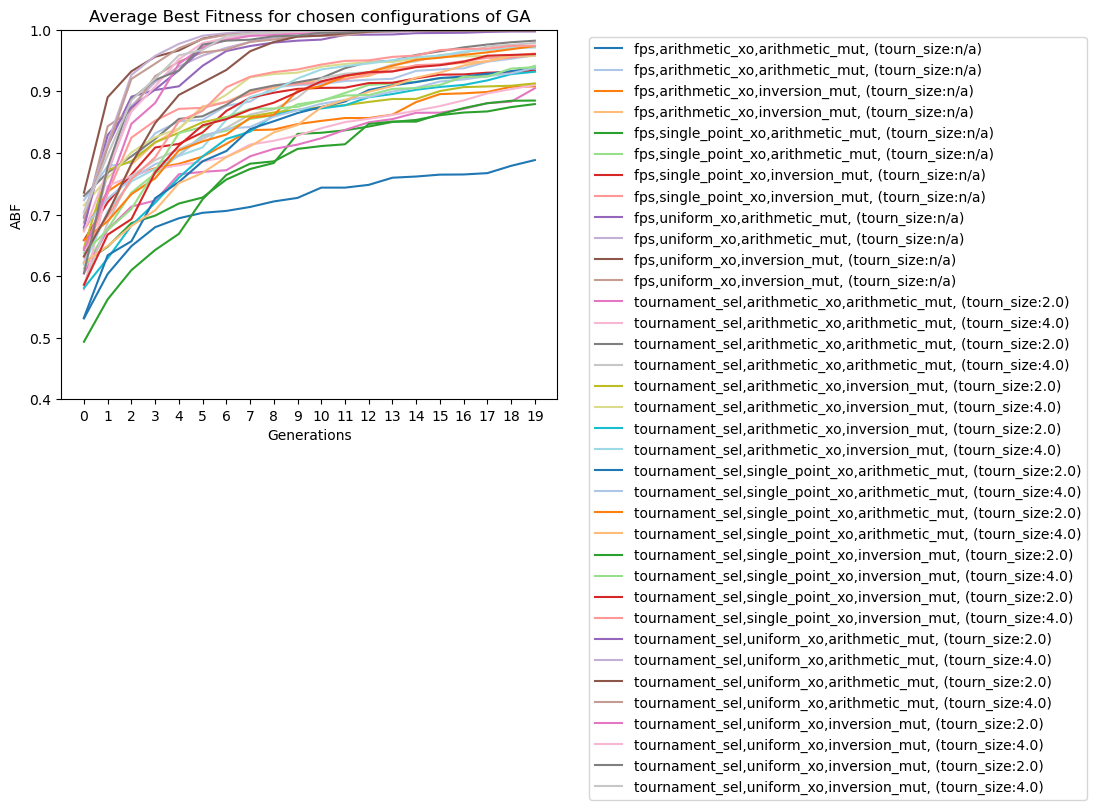

In [7]:
# The resulting graph will show the 'Average Best Fitness' for chosen configurations of GA' across 'Generations', 
# with each line corresponding to a different combination of 'select', 'crossover', 'mutate', and 'tourn_size' values.

# creates a new figure and a set of subplots
fig, ax = plt.subplots()

colormap = plt.colormaps['tab20']  # setting the colormap preference 

# loop goes through each row of the dataframe merged_df, and for each row, it creates a line on the plot
for index, row in merged_df.iterrows():
    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})',
            color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
ax.set_ylim([0.4, 1])
ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_title('Average Best Fitness for chosen configurations of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<hr>
<a class="anchor" id="selection">

#### 3.1.1. By Selection Type
    
</a>

In [8]:
# To transform the dataframe into a new configuration:
merged_df['tourn_size'] = merged_df['tourn_size'].astype('string')
merged_df['xo_prob'] = merged_df['xo_prob'].astype('string')
merged_df['mut_prob'] = merged_df['mut_prob'].astype('string')

<hr>
<a class="anchor" id="fps">

#### 3.1.1.1 Fitness Proportionate Selection
    
</a>

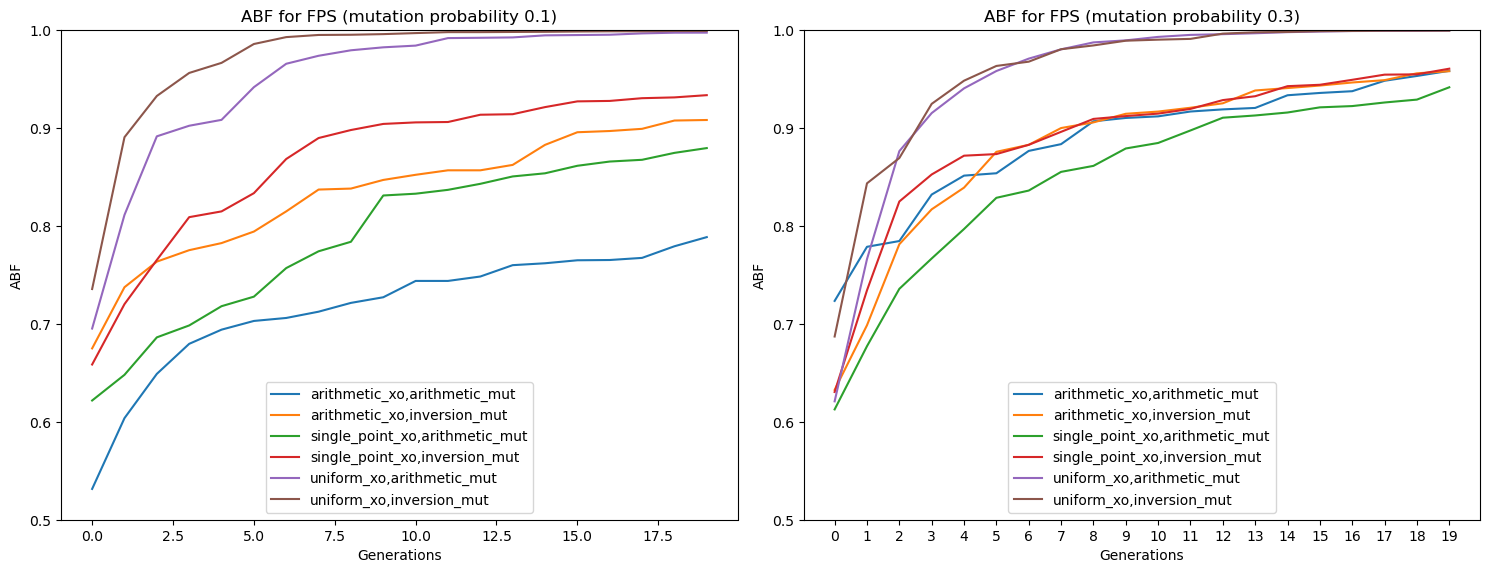

In [9]:
# Desired types
desired_select_types = ['fps']
desired_mut_prob_types = ['0.1', '0.3']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['select'] in desired_select_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
                     label=f'{row["crossover"]},{row["mutate"]}')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for FPS (mutation probability {mut_prob})')
    
    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0))

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_sel_fps.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="tourn2">

#### 3.1.1.2 Tournament Selection size 2
    
</a>

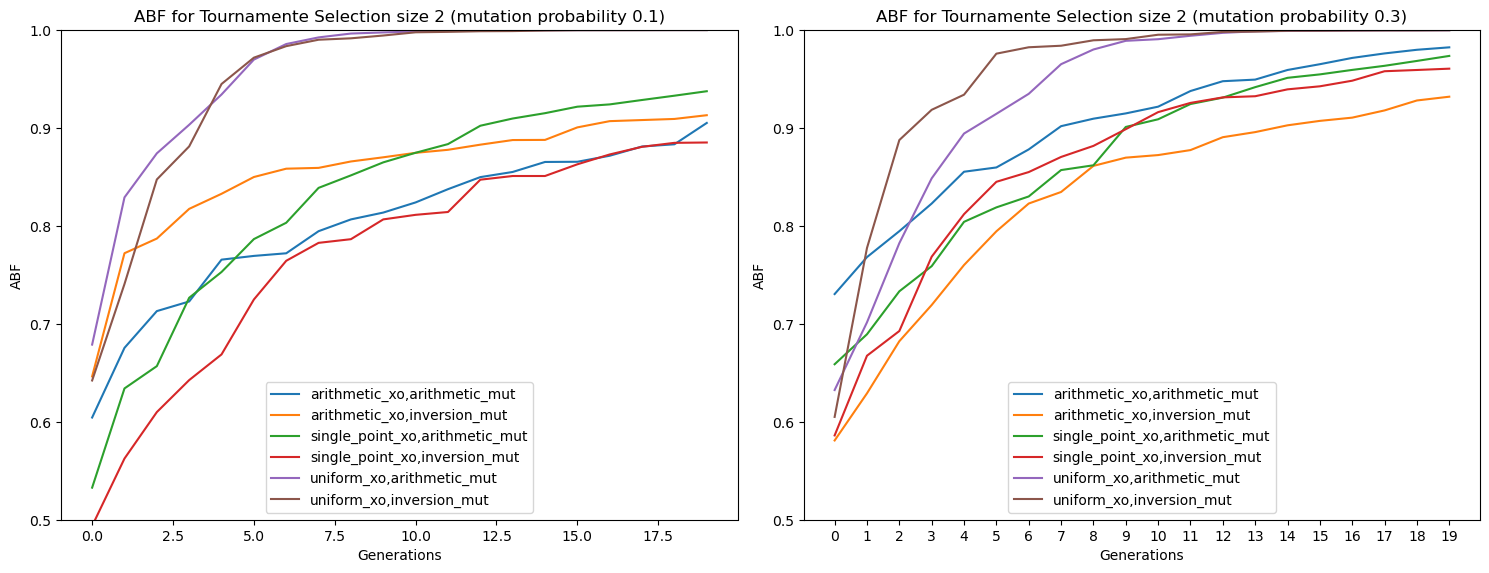

In [10]:
# Desired types
desired_select_types = ['tournament_sel']
desired_mut_prob_types = ['0.1', '0.3']
desired_tourn_size_types = ['2.0']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['select'] in desired_select_types and row['tourn_size'] in desired_tourn_size_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
                            label=f'{row["crossover"]},{row["mutate"]}')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for Tournamente Selection size 2 (mutation probability {mut_prob})')

    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0))

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_sel_tourn2.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="tourn4">

#### 3.1.1.3 Tournament Selection size 4
    
</a>

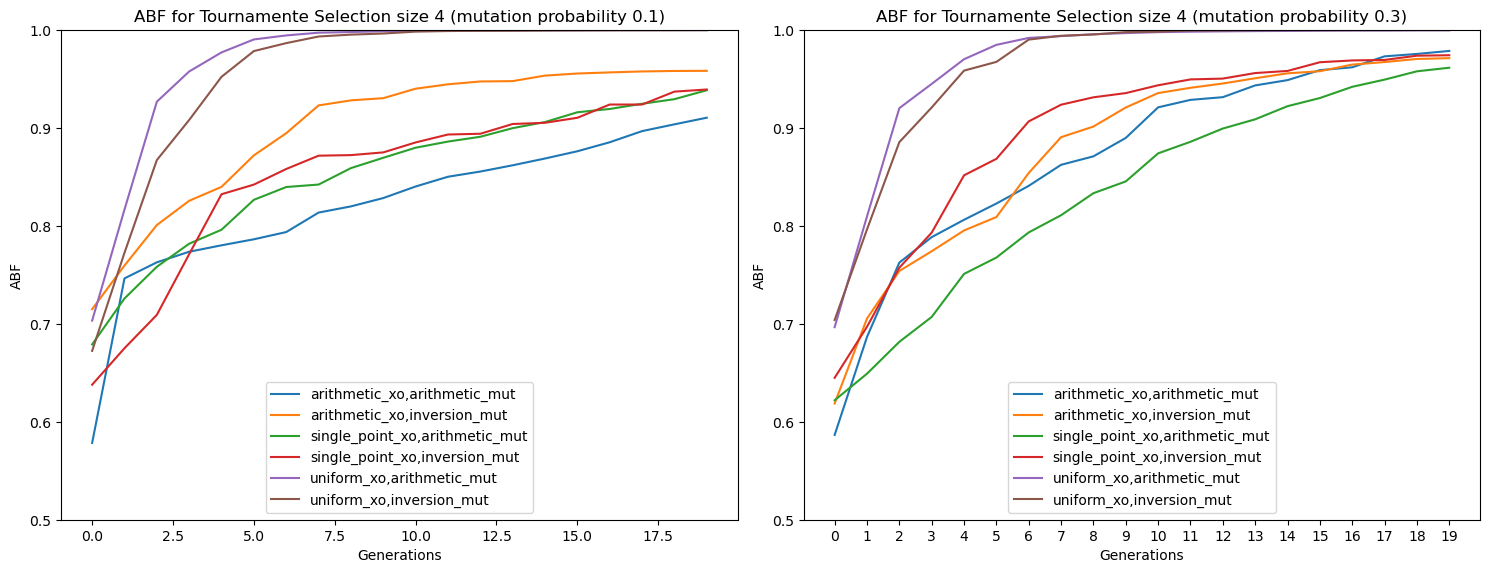

In [11]:
# Desired types
desired_select_types = ['tournament_sel']
desired_mut_prob_types = ['0.1', '0.3']
desired_tourn_size_types = ['4.0']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['select'] in desired_select_types and row['tourn_size'] in desired_tourn_size_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
                            label=f'{row["crossover"]},{row["mutate"]}')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for Tournamente Selection size 4 (mutation probability {mut_prob})')

    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0))    

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_sel_tourn4.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="crossover">

#### 3.1.2. By Crossover Type
    
</a>

<hr>
<a class="anchor" id="singlexo">

##### 3.1.2.1. Single Point Crossover
    
</a>

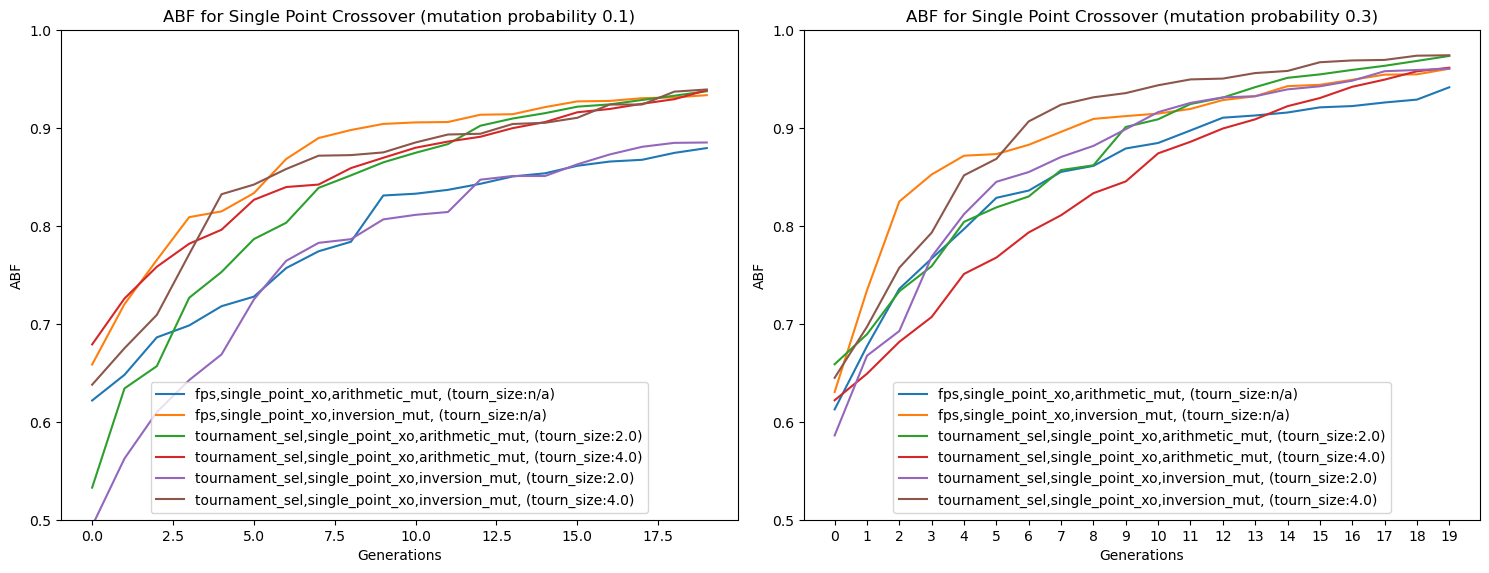

In [12]:
# Desired types of 'select'
desired_crossover_types = ['single_point_xo']
desired_mut_prob_types = ['0.1', '0.3']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['crossover'] in desired_crossover_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
                            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for Single Point Crossover (mutation probability {mut_prob})')
    
    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0)) 

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_xo_singlepoint.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="arithmeticxo">

##### 3.1.2.2. Arithmetic Crossover
    
</a>

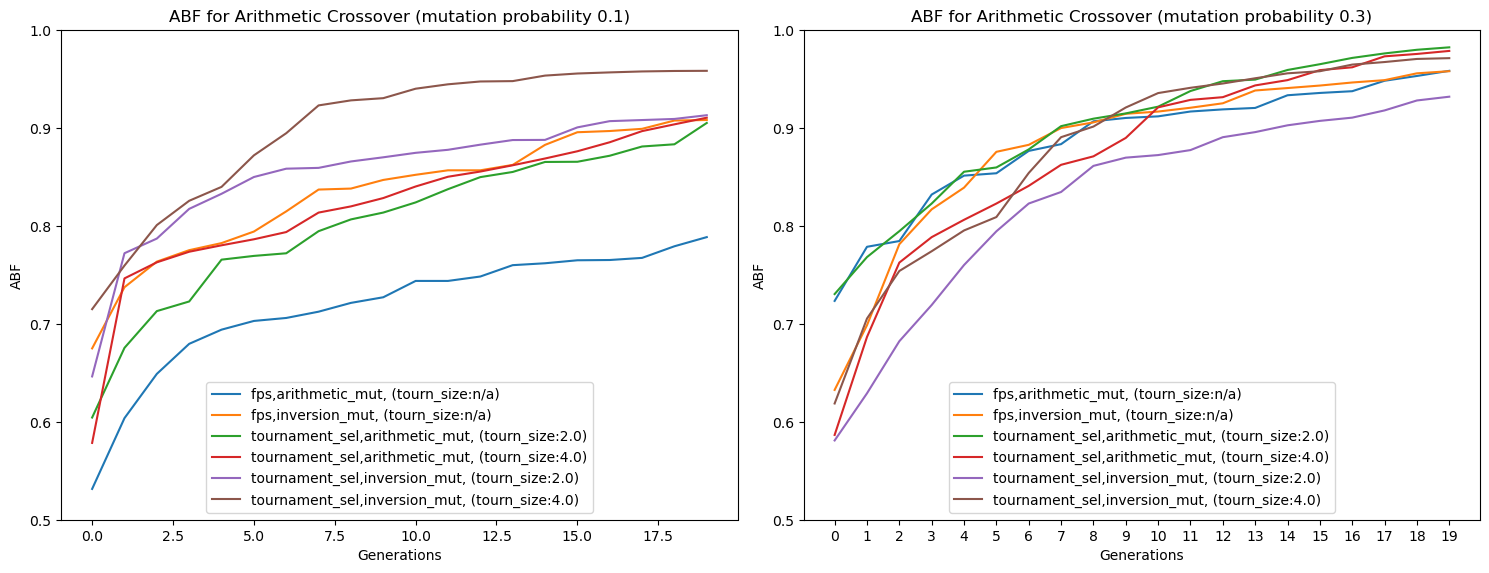

In [13]:
# Desired types of 'select'
desired_crossover_types = ['arithmetic_xo']
desired_mut_prob_types = ['0.1', '0.3']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['crossover'] in desired_crossover_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
                            label=f'{row["select"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for Arithmetic Crossover (mutation probability {mut_prob})')
    
    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0)) 

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_xo_arithmetic.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="uniformxo">

##### 3.1.2.3. Uniform Crossover
    
</a>

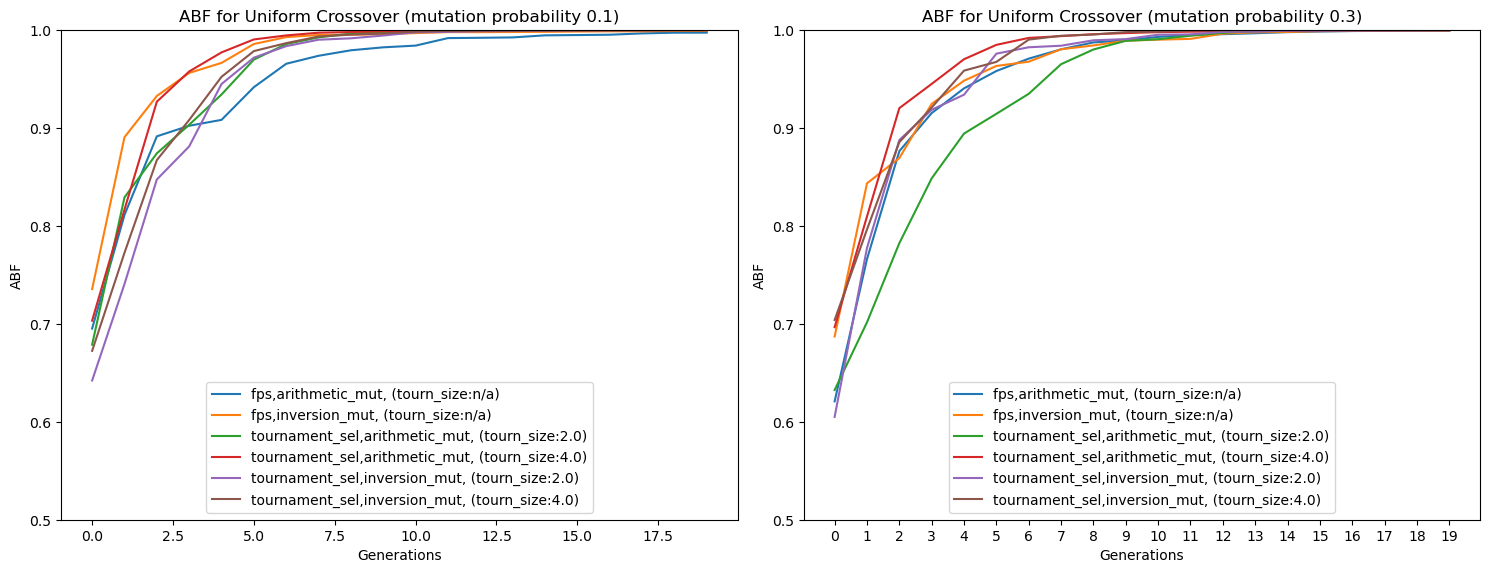

In [14]:
# Desired types of 'select'
desired_crossover_types = ['uniform_xo']
desired_mut_prob_types = ['0.1', '0.3']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['crossover'] in desired_crossover_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
                            label=f'{row["select"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for Uniform Crossover (mutation probability {mut_prob})')
    
    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0)) 

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_xo_uniform.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="mutation">

#### 3.1.3. By Mutation Type
    
</a>

<hr>
<a class="anchor" id="inversionmu">

##### 3.1.3.1. Inversion Mutation
    
</a>

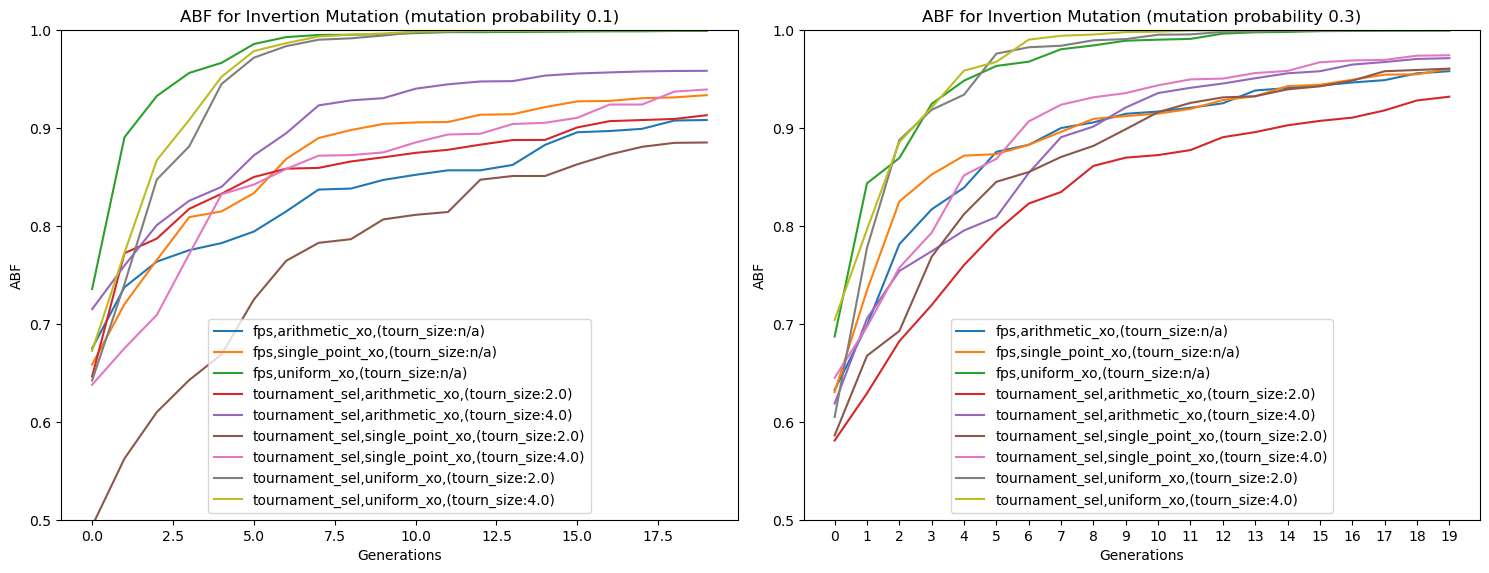

In [15]:
# Desired types of 'select'
desired_mutation_types = ['inversion_mut']
desired_mut_prob_types = ['0.1', '0.3']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['mutate'] in desired_mutation_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
                            label=f'{row["select"]},{row["crossover"]},(tourn_size:{row["tourn_size"]})')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for Invertion Mutation (mutation probability {mut_prob})')

    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0))     

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_mut_inversion.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="arithmeticmu">

##### 3.1.3.2. Arithmetic Mutation
    
</a>

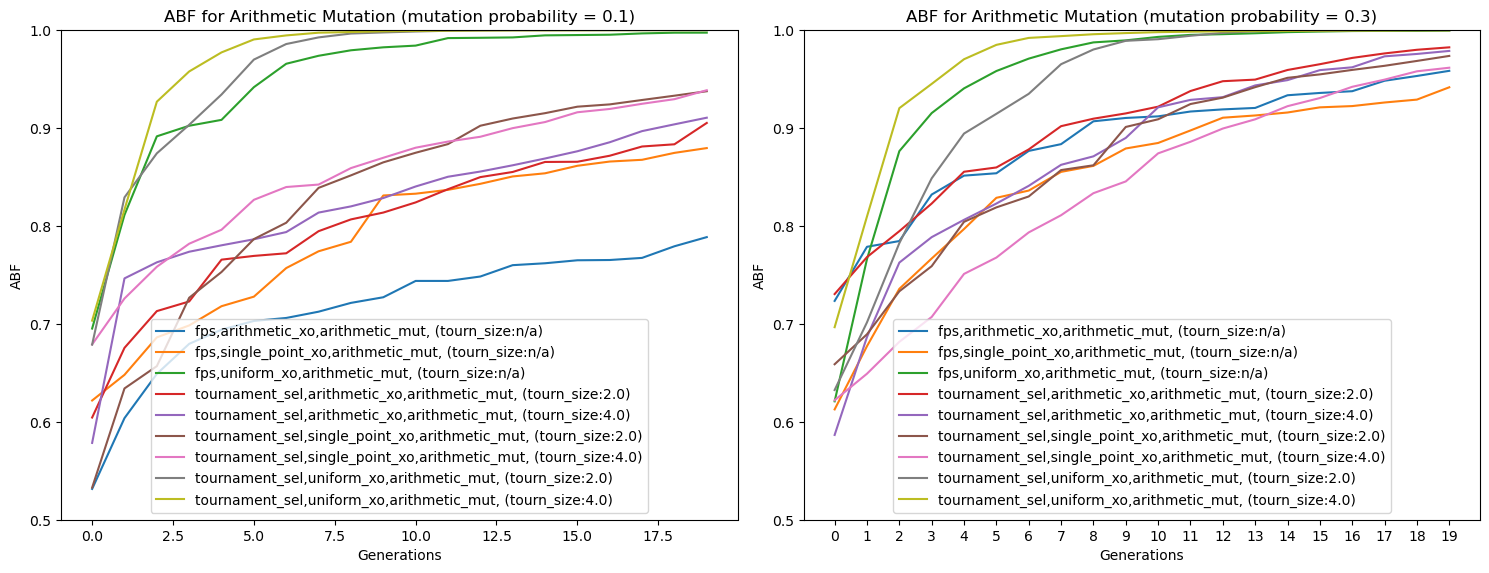

In [16]:
# Desired types of 'select'
desired_mutation_types = ['arithmetic_mut']
desired_mut_prob_types = ['0.1', '0.3']

# creates a new figure and a set of subplots
fig, axs = plt.subplots(1, len(desired_mut_prob_types), figsize=(15, 7))

for ax_idx, mut_prob in enumerate(desired_mut_prob_types):
    ax = axs[ax_idx]  # choose the subplot
    ax.grid(False)  # hide the grid lines
    for index, row in merged_df.iterrows():
        if row['mutate'] in desired_mutation_types and row['mut_prob'] == mut_prob:
            ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})')
            plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
    ax.set_ylim([0.5, 1])
    ax.set_xlabel('Generations')
    ax.set_ylabel('ABF')
    ax.set_title(f'ABF for Arithmetic Mutation (mutation probability = {mut_prob})')

    # Create a legend for each subplot
    ax.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, 0))    

# Adjust layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save the figure before calling plt.show()
plt.savefig("output_images/lineplot_mut_arithmetic.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="lineplotstd">

### 3.2. Line Plot with standard Desviation
    
</a>

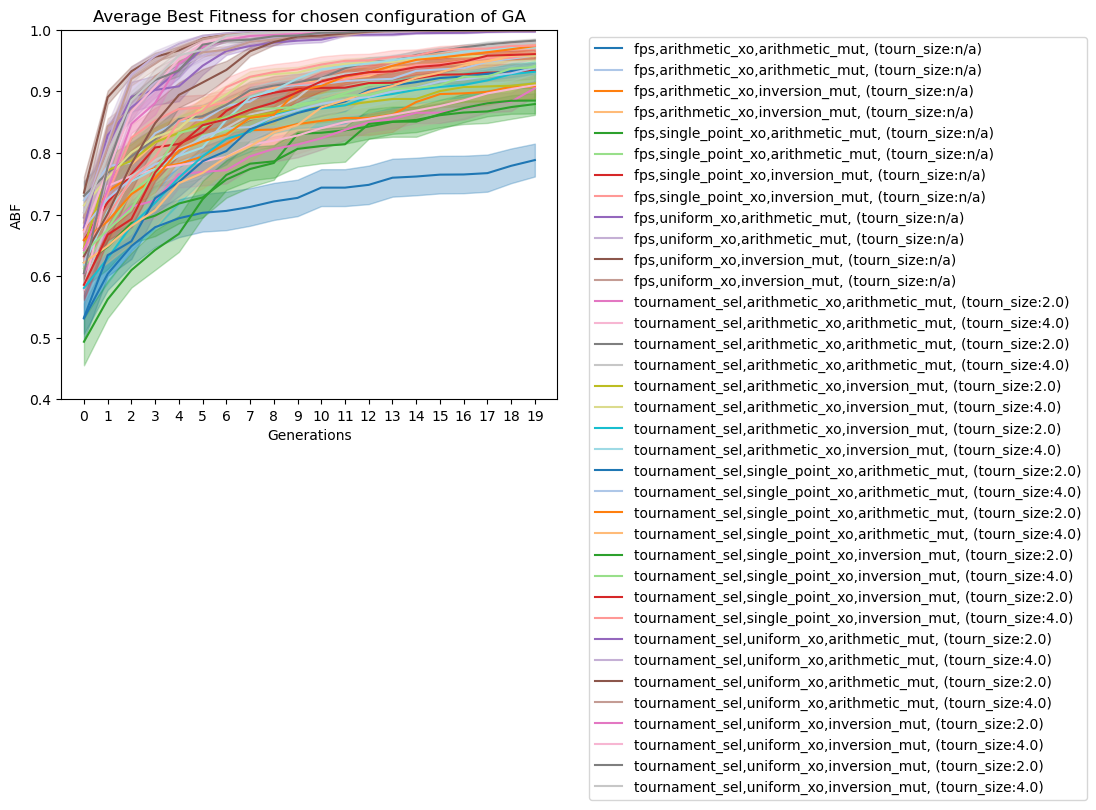

In [17]:
# The representation generates a line plot with shaded standard desviation regions
# The shaded regions represent the standard deviation around the 'ABF' values

fig, ax = plt.subplots()

for index, row in merged_df.iterrows():
    upper_bound = row['ABF'] + 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2
    lower_bound = row['ABF'] - 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2

    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})',
            color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
    ax.fill_between(range(len(row['ABF'])),lower_bound, upper_bound, alpha=0.3,
                    color=colormap(index % colormap.N))
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))

ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_ylim([0.4, 1])
ax.set_title('Average Best Fitness for chosen configuration of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<hr>
<a class="anchor" id="boxplot">

### 3.3. BoxPlot for each configuration
    
</a>

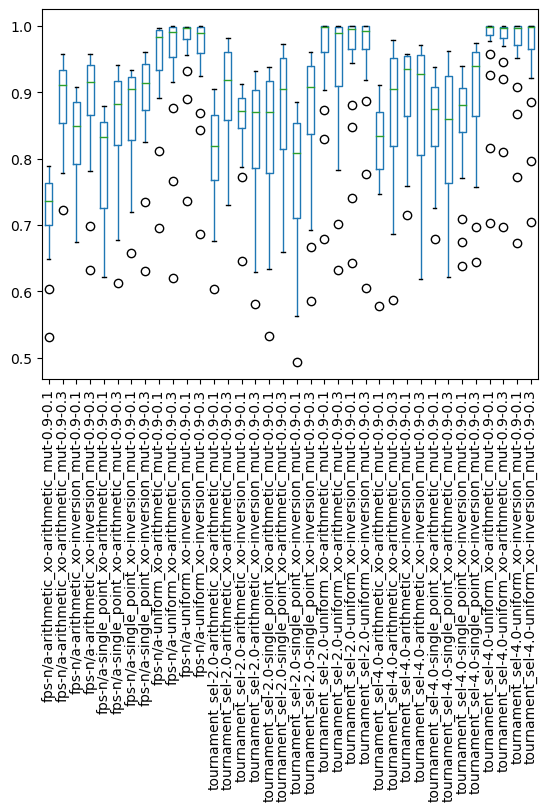

In [18]:
# Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
merged_df['combined'] = merged_df['select'] + '-' + merged_df['tourn_size'] + '-' + merged_df['crossover'] + '-' + merged_df['mutate'] + '-' + merged_df['xo_prob'] + '-' + merged_df['mut_prob'] 

# Initialize the new DataFrame
new_df = pd.DataFrame()

# For each unique combination, create a new column in the new DataFrame
for combo in merged_df['combined'].unique():
    # Get the 'ABF' values for this combination, reset the index, and drop the old index
    temp_df = merged_df.loc[merged_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
    # Transpose the DataFrame so each value in 'ABF' becomes a separate row
    temp_df = temp_df.T
    # Add this DataFrame to the new DataFrame, using the combo as the column name
    new_df[combo] = temp_df[0]

# sort the DataFrame columns by their names
new_df = new_df.sort_index(axis=1, ascending=True)
    
new_df.boxplot()
plt.grid(False) 
plt.xticks(rotation='vertical')
plt.show()

<hr>
<a class="anchor" id="boxplotselection">

#### 3.3.1. By Selection Type
    
</a>

<hr>
<a class="anchor" id="boxplotfps">

#### 3.3.1.1 Fitness Proportionate Selection
    
</a>

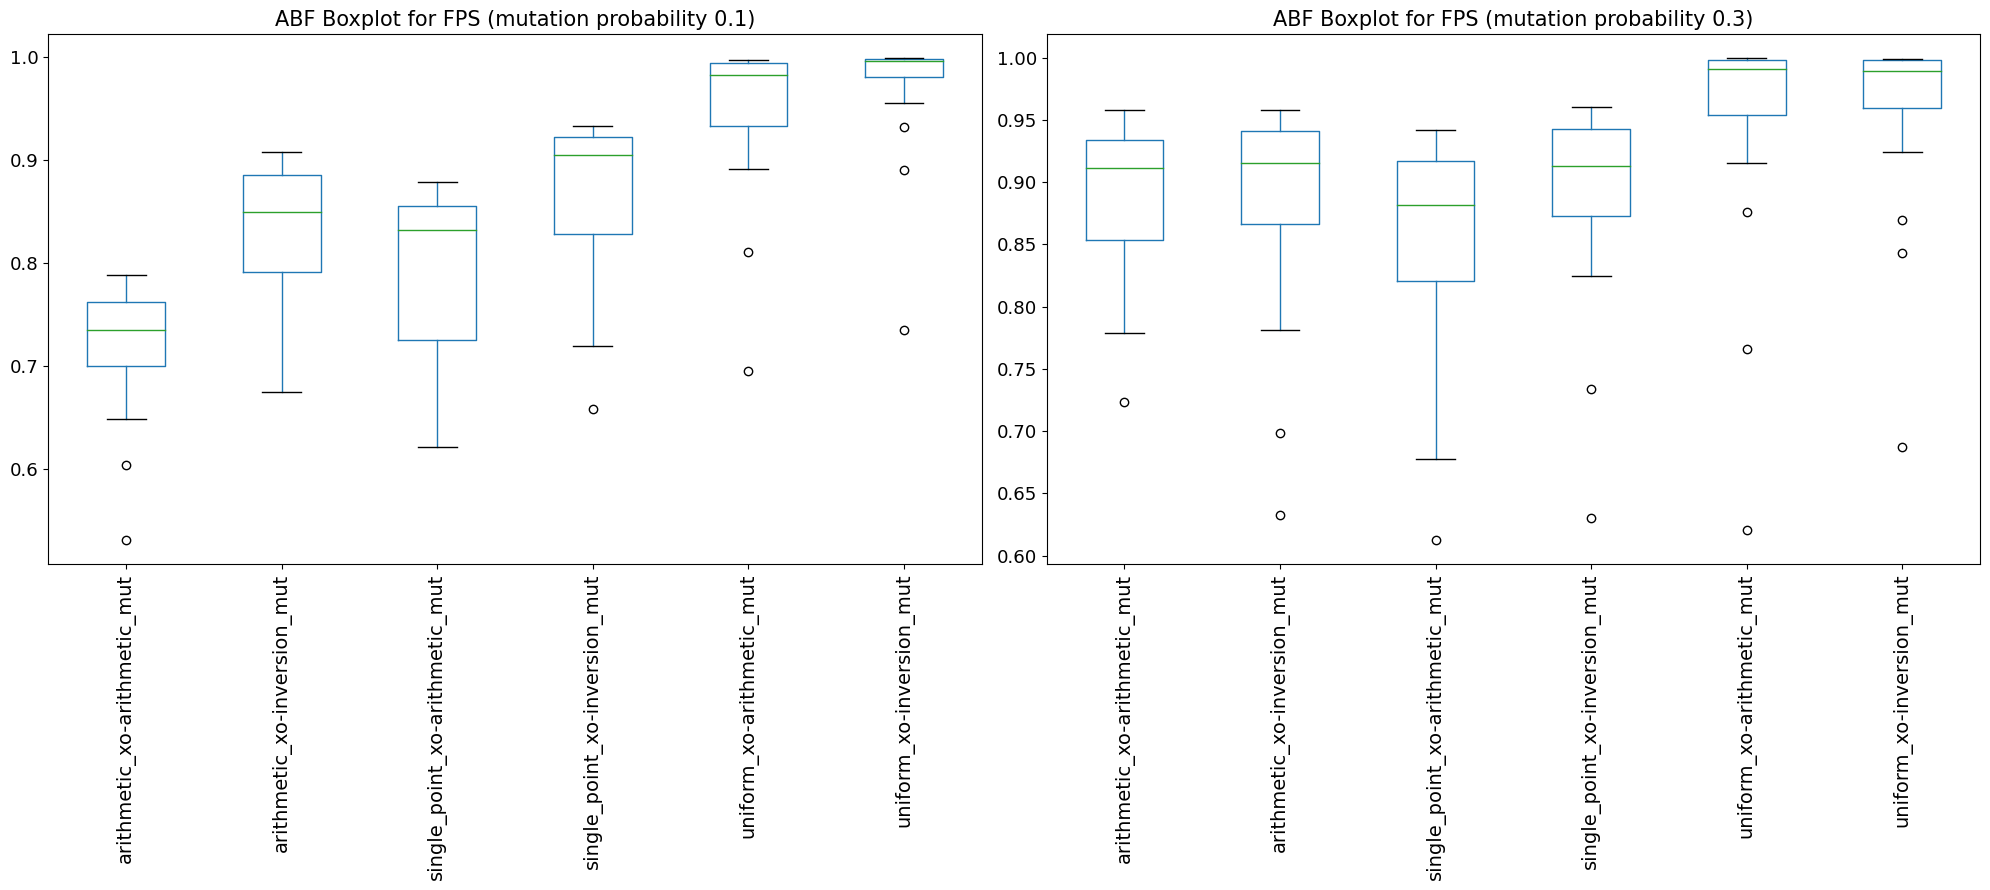

In [19]:
select_type = 'fps'
mut_probs = merged_df['mut_prob'].unique()

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['select'] == select_type) & (merged_df['mut_prob'] == mut_prob)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['crossover'] + '-' + filtered_df['mutate'] # + '-' + filtered_df['xo_prob'] + '-' + filtered_df['mut_prob']

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for FPS (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_sel_fps.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplottourn2">

#### 3.3.1.2 Tournament Selection size 2
    
</a>

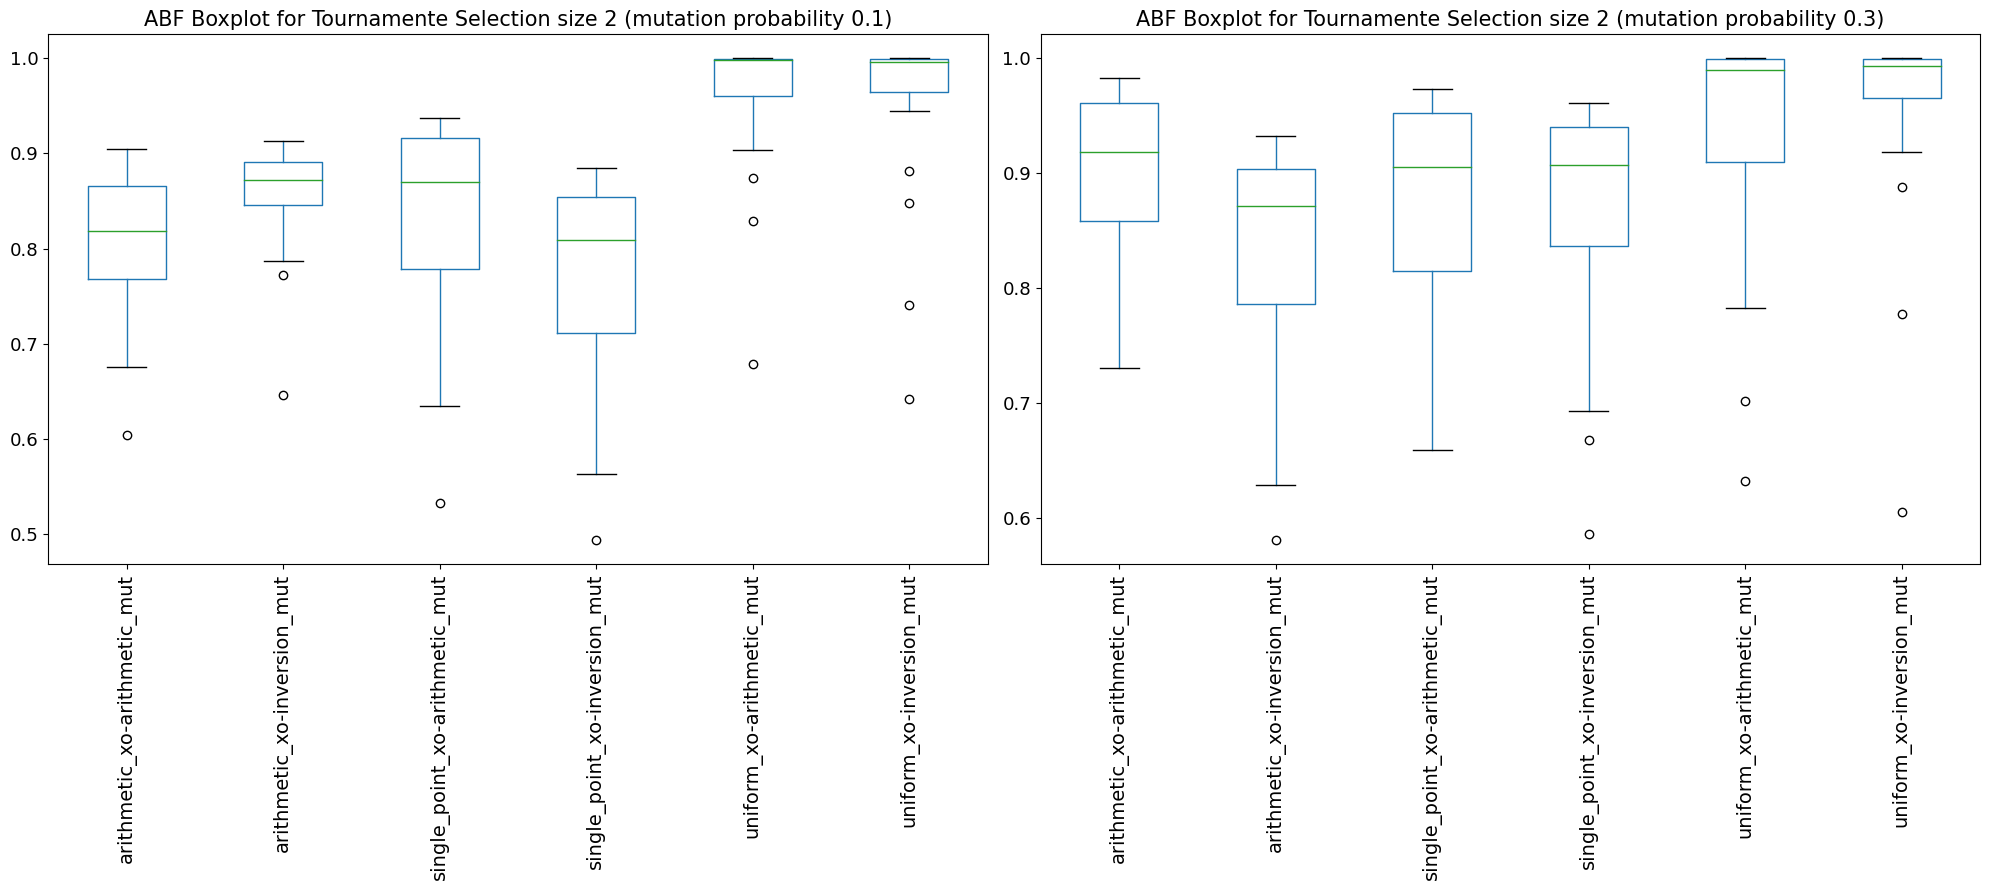

In [20]:
select_type = 'tournament_sel'
mut_probs = merged_df['mut_prob'].unique()
select_size = '2.0'

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['select'] == select_type) & (merged_df['mut_prob'] == mut_prob) & (merged_df['tourn_size'] == select_size)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['crossover'] + '-' + filtered_df['mutate'] # + '-' + filtered_df['xo_prob'] + '-' + filtered_df['mut_prob']

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for Tournamente Selection size 2 (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_sel_tourn_2.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplottourn4">

#### 3.3.1.3 Tournament Selection size 4
    
</a>

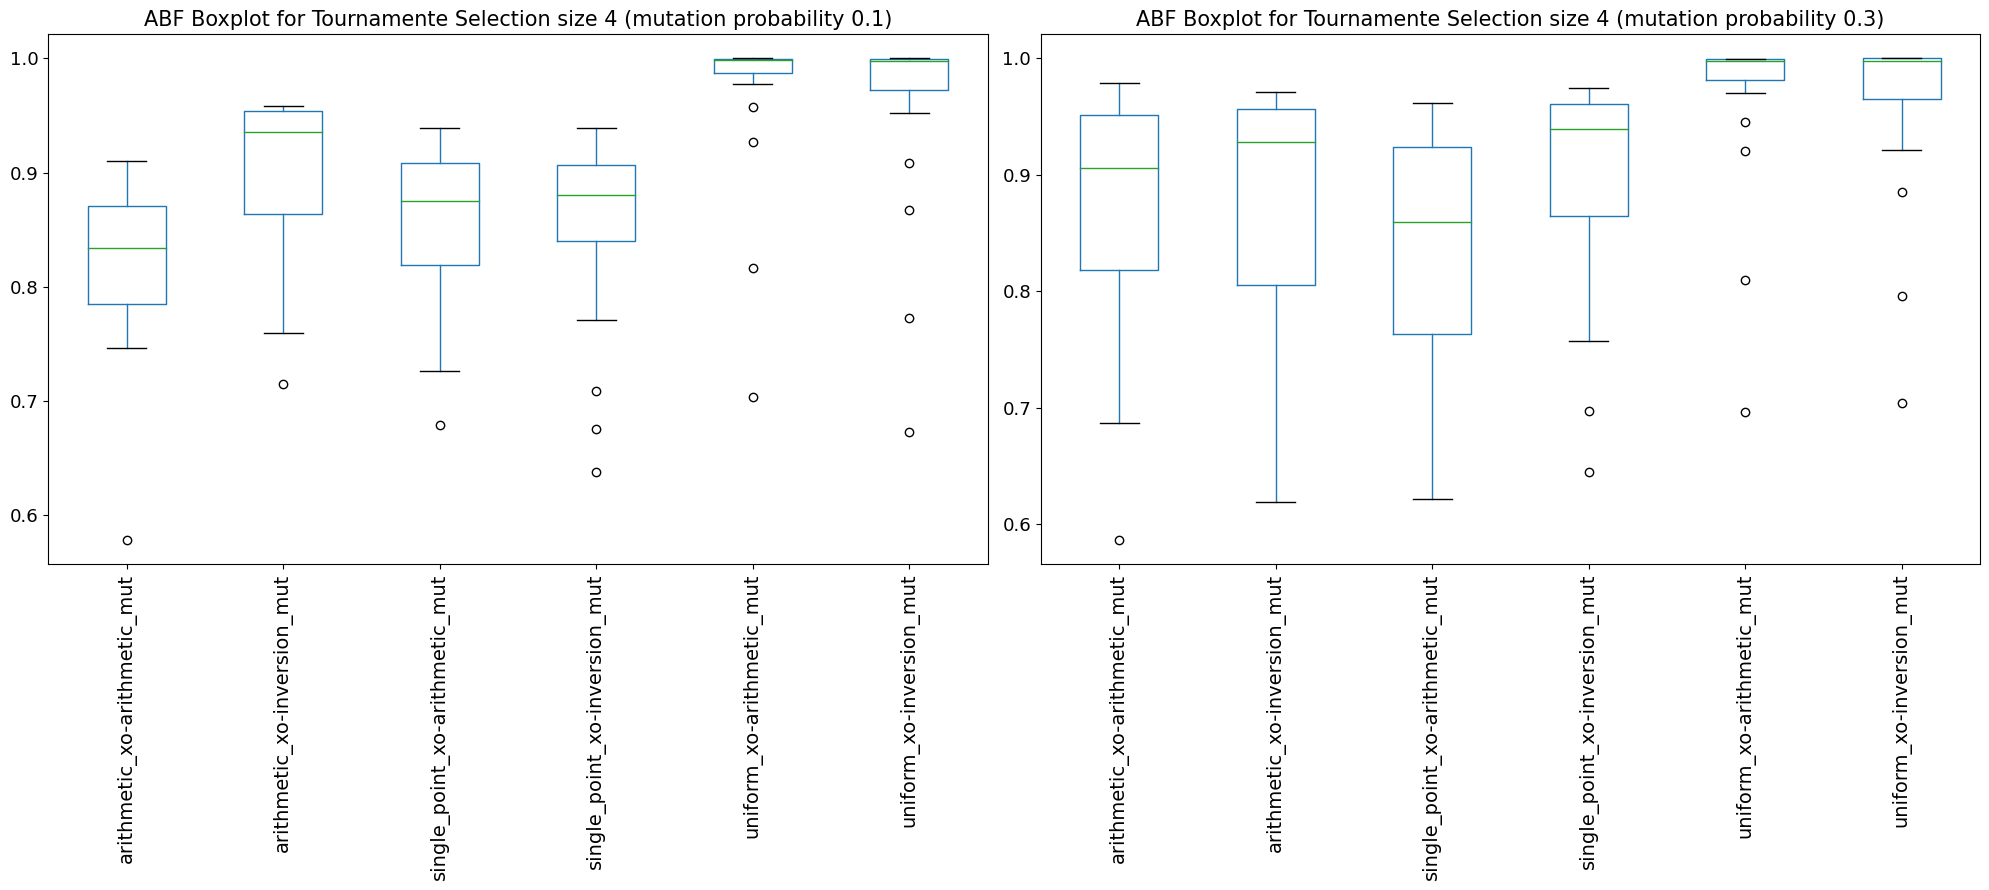

In [21]:
select_type = 'tournament_sel'
mut_probs = merged_df['mut_prob'].unique()
select_size = '4.0'

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['select'] == select_type) & (merged_df['mut_prob'] == mut_prob) & (merged_df['tourn_size'] == select_size)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['crossover'] + '-' + filtered_df['mutate'] # + '-' + filtered_df['xo_prob'] + '-' + filtered_df['mut_prob']

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for Tournamente Selection size 4 (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_sel_tourn_4.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplotcrossover">

#### 3.3.2. By Crossover Type
    
</a>



<hr>
<a class="anchor" id="boxplotsinglexo">

##### 3.3.2.1. Single Point Crossover
    
</a>

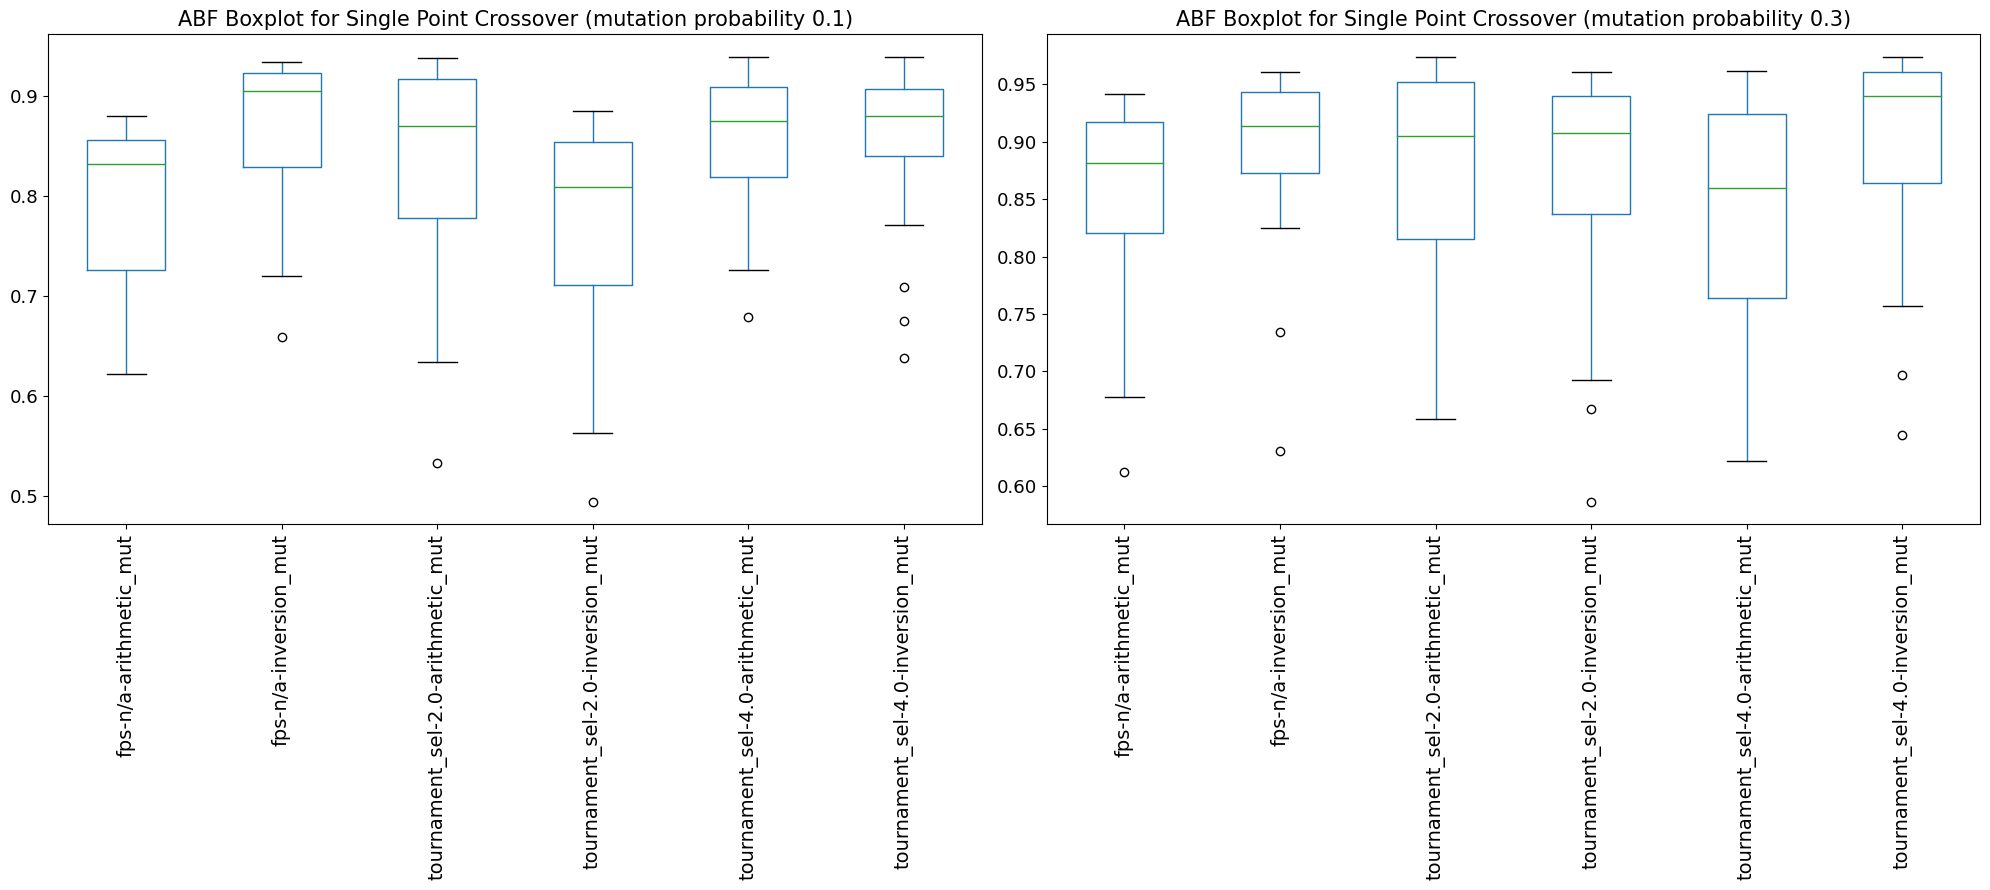

In [22]:
crossover_type = 'single_point_xo'
mut_probs = merged_df['mut_prob'].unique()

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['crossover'] == crossover_type) & (merged_df['mut_prob'] == mut_prob)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['select'] + '-' + filtered_df['tourn_size'] + '-' + filtered_df['mutate'] 

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for Single Point Crossover (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_xo_single.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplotarithmeticxo">

##### 3.3.2.2. Arithmetic Crossover
    
</a>

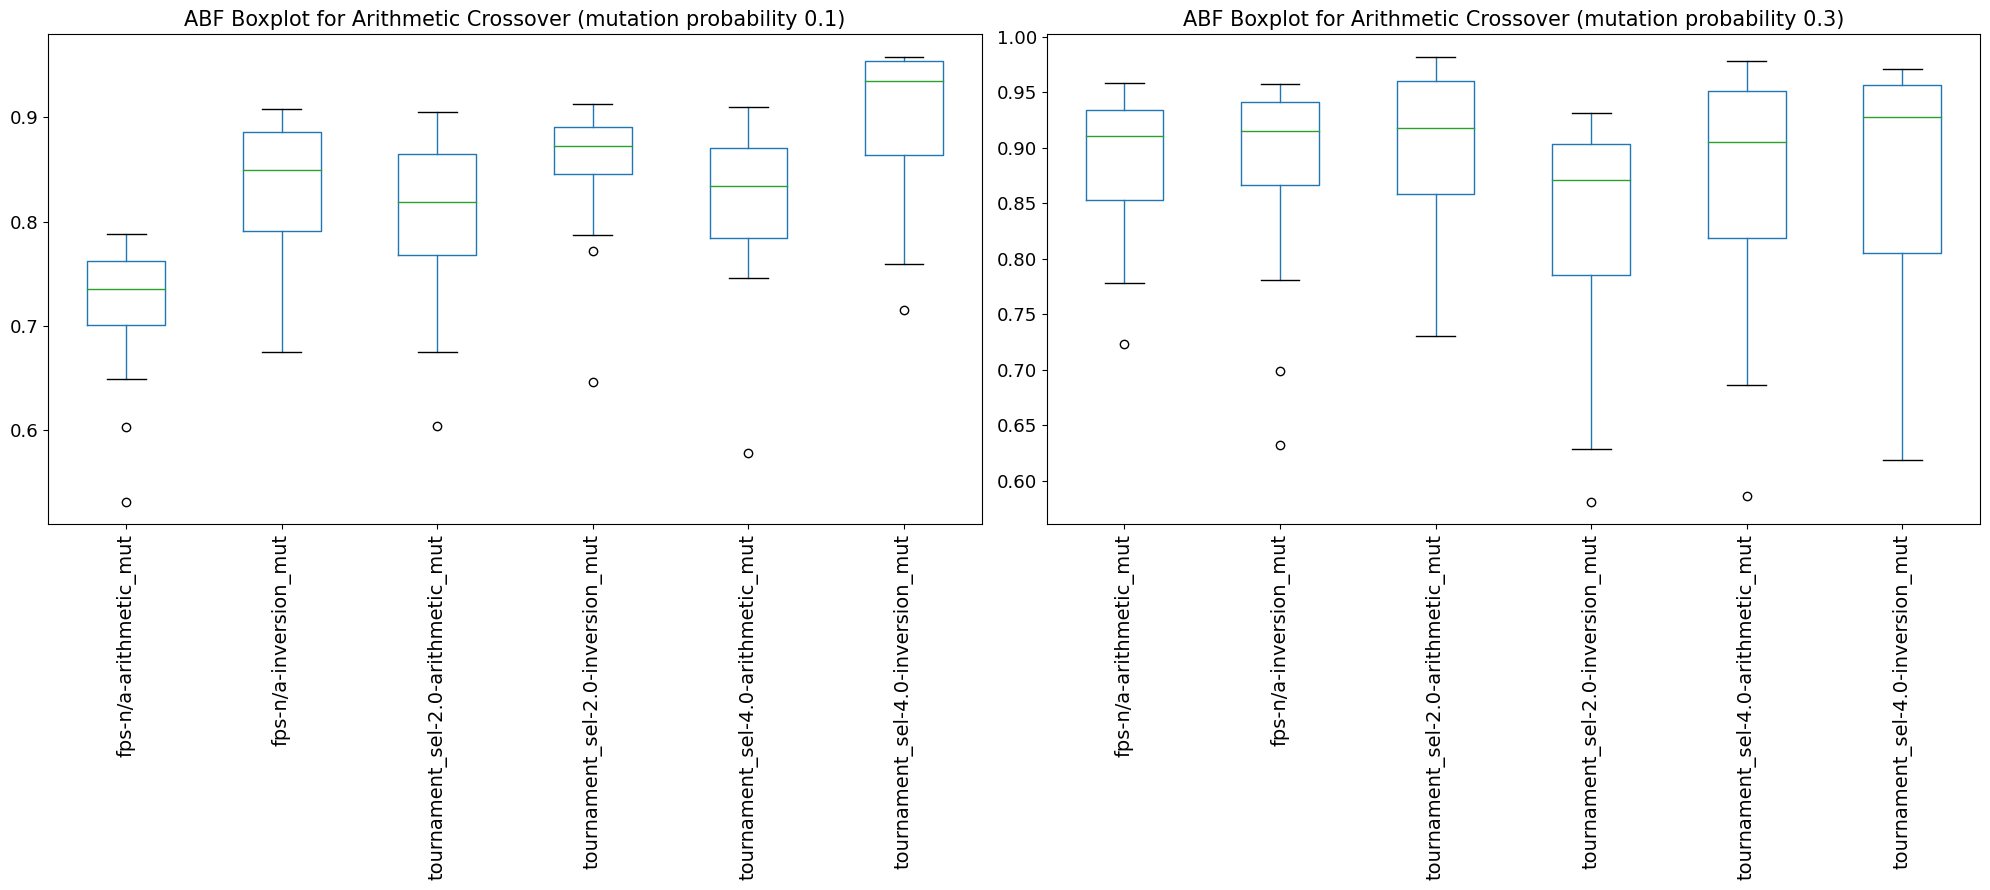

In [23]:
crossover_type = 'arithmetic_xo'
mut_probs = merged_df['mut_prob'].unique()

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['crossover'] == crossover_type) & (merged_df['mut_prob'] == mut_prob)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['select'] + '-' + filtered_df['tourn_size'] + '-' + filtered_df['mutate'] 

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for Arithmetic Crossover (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_xo_arithmetic.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplotuniformxo">

##### 3.3.2.3. Uniform Crossover
    
</a>

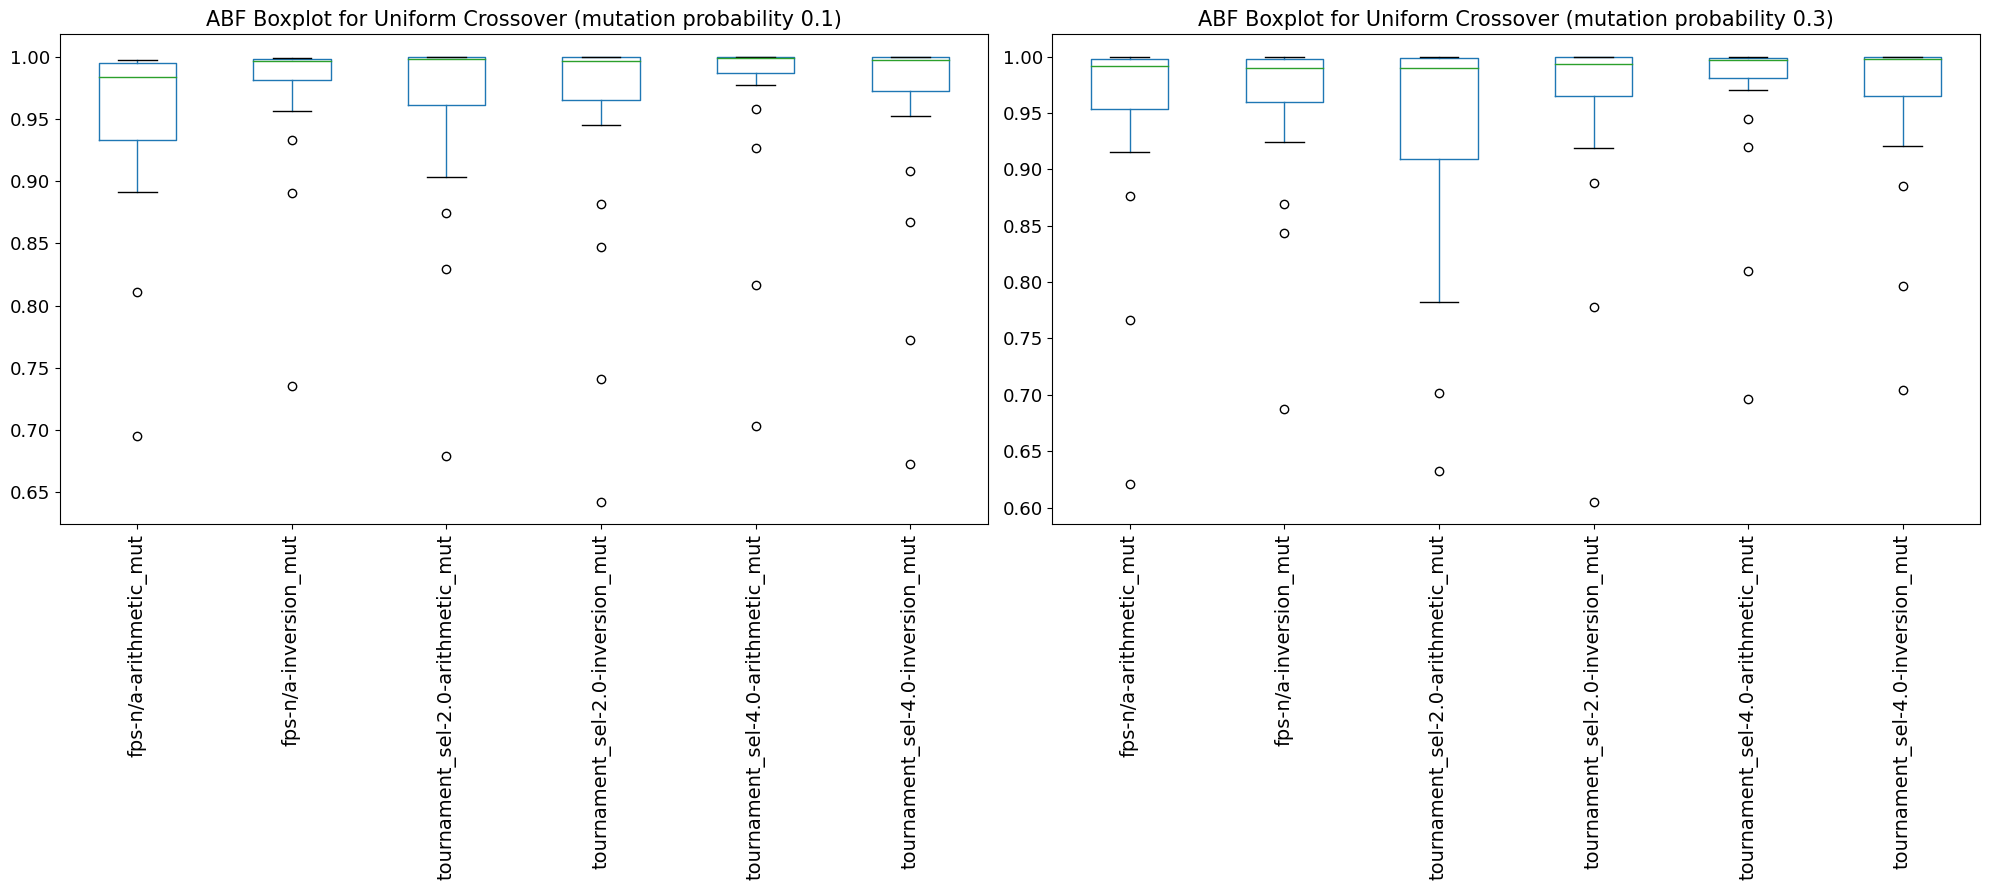

In [24]:
crossover_type = 'uniform_xo'
mut_probs = merged_df['mut_prob'].unique()

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['crossover'] == crossover_type) & (merged_df['mut_prob'] == mut_prob)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['select'] + '-' + filtered_df['tourn_size'] + '-' + filtered_df['mutate'] 

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for Uniform Crossover (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_xo_uniform.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplotmutation">

#### 3.3.3. By Mutation Type
    
</a>

<hr>
<a class="anchor" id="boxplotinversionmu">

##### 3.3.3.1. Inversion Mutation
    
</a>

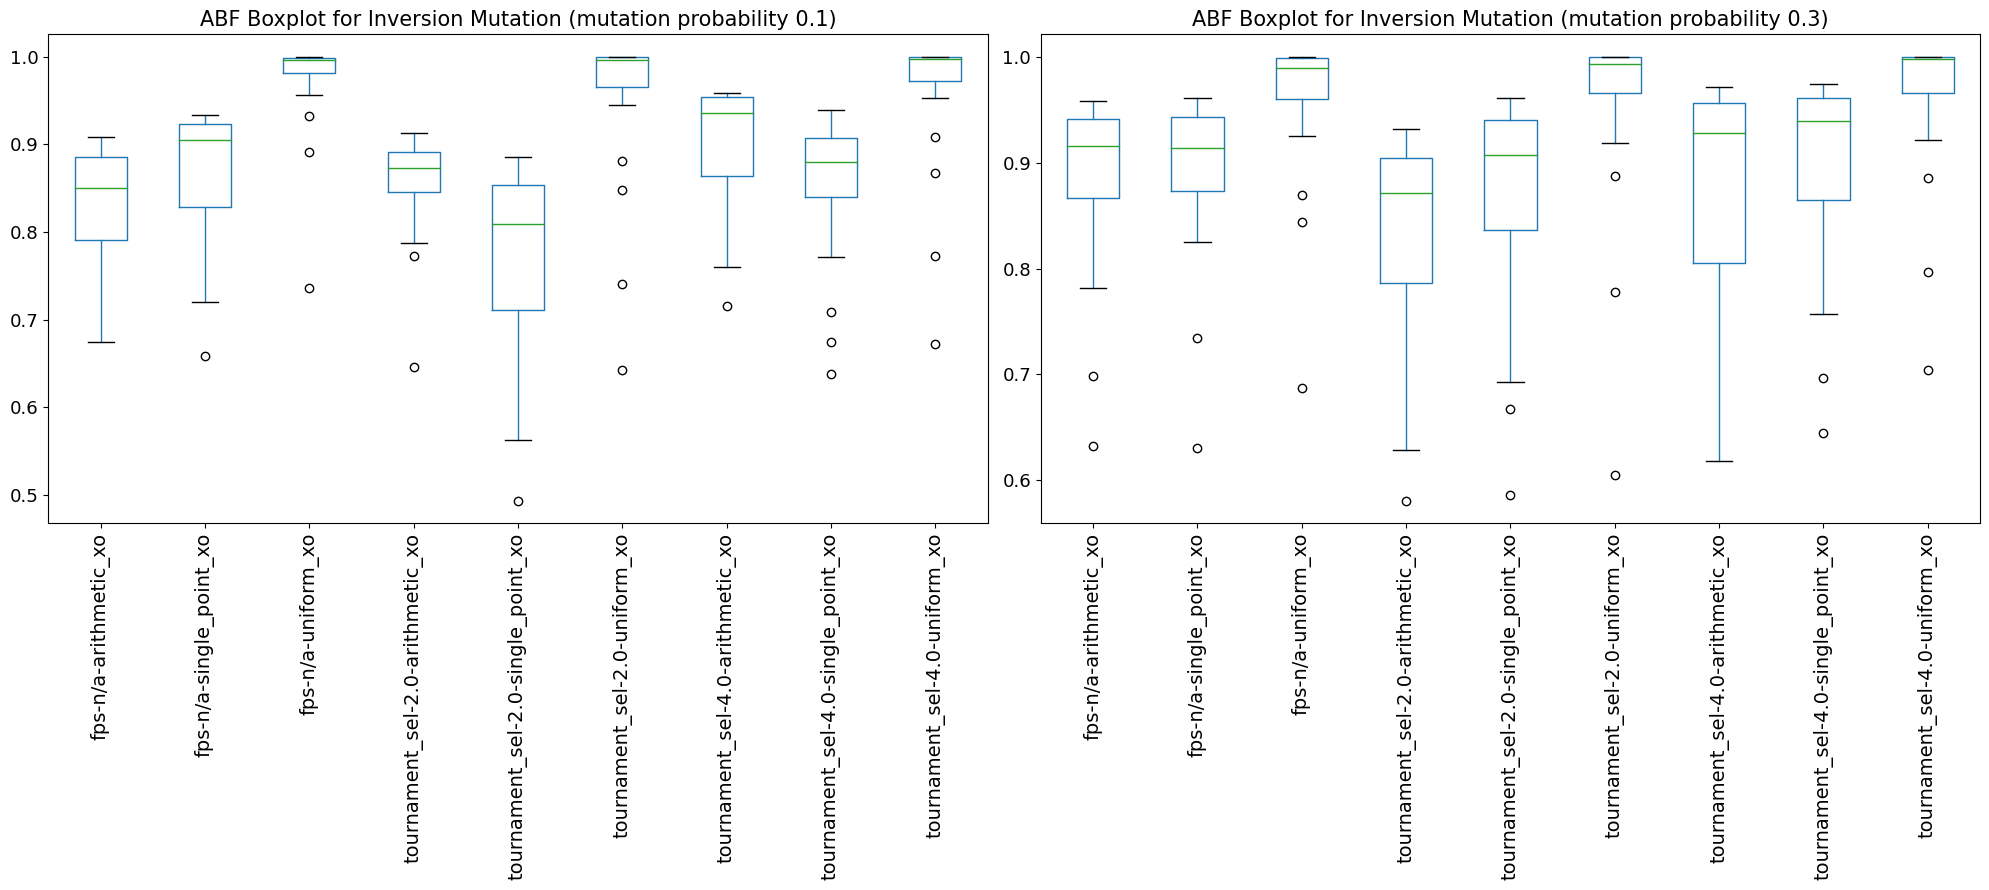

In [25]:
mutation_type = 'inversion_mut'
mut_probs = merged_df['mut_prob'].unique()

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['mutate'] == mutation_type) & (merged_df['mut_prob'] == mut_prob)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['select'] + '-' + filtered_df['tourn_size'] + '-' + filtered_df['crossover'] 

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for Inversion Mutation (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_mut_inversion.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplotarithmeticmu">

##### 3.3.3.2. Arithmetic Mutation
    
</a>

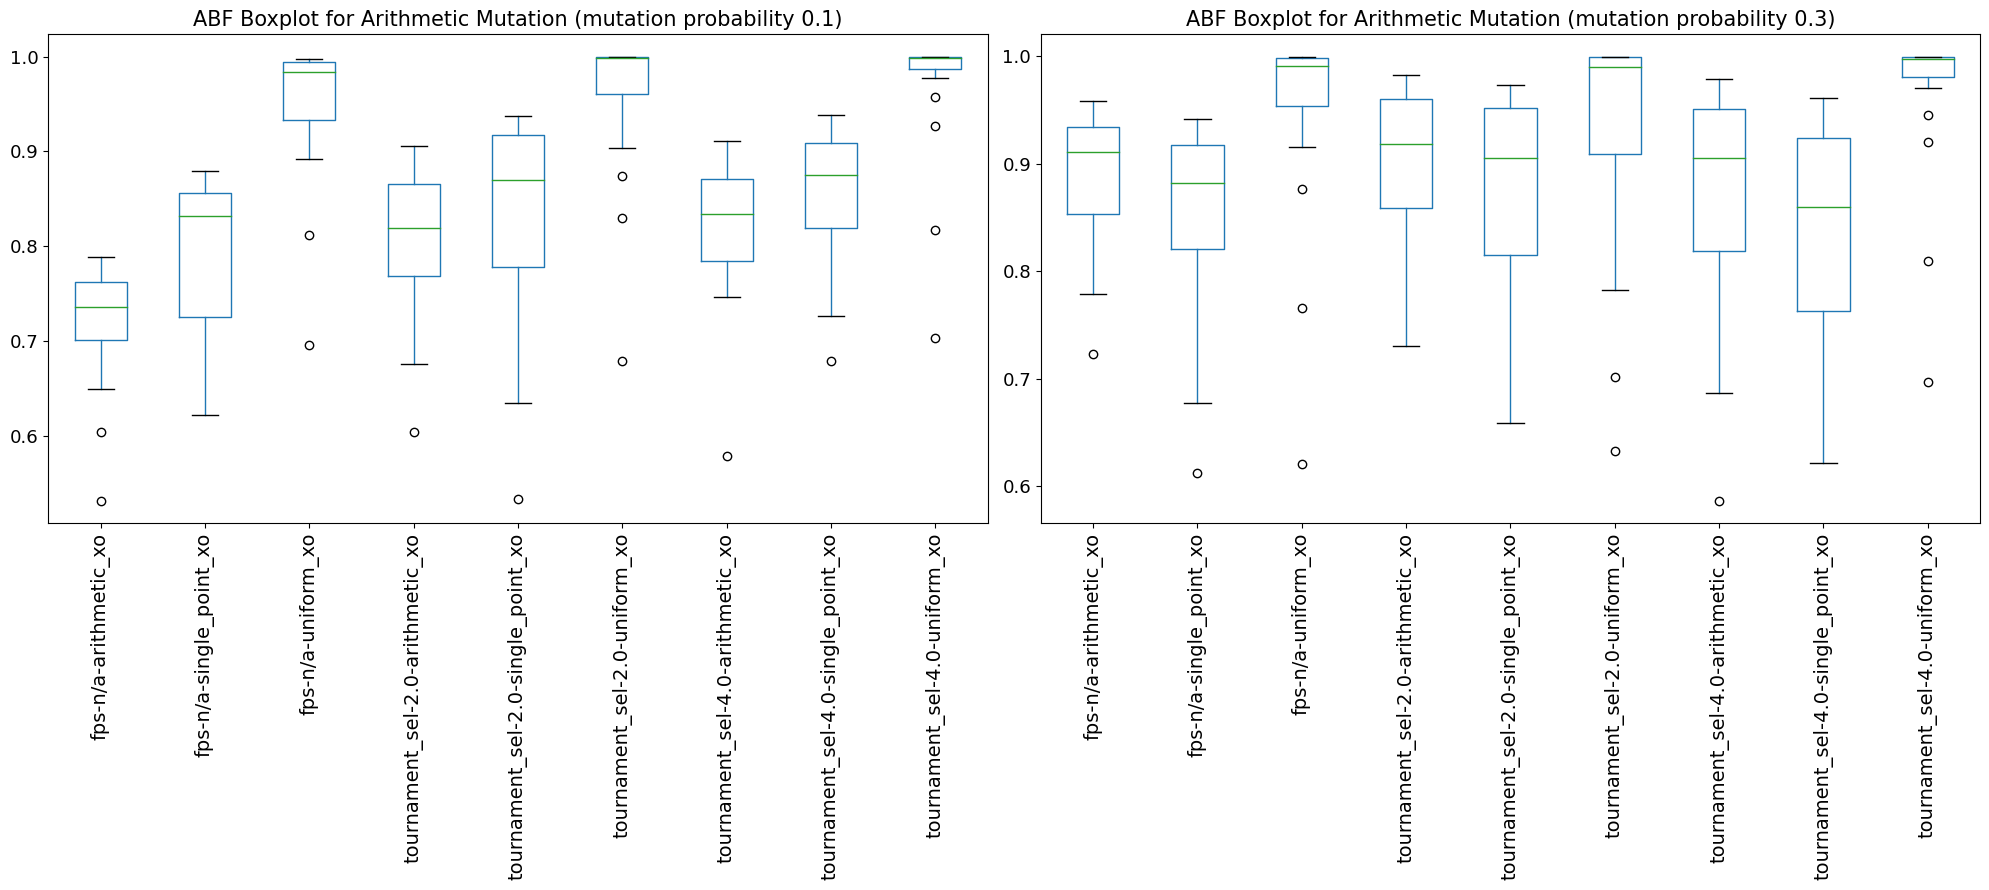

In [26]:
mutation_type = 'arithmetic_mut'
mut_probs = merged_df['mut_prob'].unique()

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

for i, mut_prob in enumerate(mut_probs):
    # Filter the data for the desired select type and mut_prob
    filtered_df = merged_df[(merged_df['mutate'] == mutation_type) & (merged_df['mut_prob'] == mut_prob)].copy()

    # Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
    filtered_df.loc[:, 'combined'] = filtered_df['select'] + '-' + filtered_df['tourn_size'] + '-' + filtered_df['crossover'] 

    # Initialize the new DataFrame
    new_df = pd.DataFrame()

    # For each unique combination, create a new column in the new DataFrame
    for combo in filtered_df['combined'].unique():
        # Get the 'ABF' values for this combination, reset the index, and drop the old index
        temp_df = filtered_df.loc[filtered_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
        # Transpose the DataFrame so each value in 'ABF' becomes a separate row
        temp_df = temp_df.T
        # Add this DataFrame to the new DataFrame, using the combo as the column name
        new_df[combo] = temp_df[0]

    # Sort the DataFrame columns by their names
    new_df = new_df.sort_index(axis=1, ascending=True)

    # Plot
    new_df.boxplot(ax=axs[i])
    axs[i].set_title(f'ABF Boxplot for Arithmetic Mutation (mutation probability {mut_prob})', fontsize=15)
    axs[i].grid(False) 
    axs[i].set_xticklabels(new_df.columns, rotation='vertical')
    axs[i].xaxis.set_tick_params(labelsize=14)  # Increase the font size of x-axis labels
    axs[i].yaxis.set_tick_params(labelsize=13)  # Increase the font size of x-axis labels

plt.tight_layout()
    
# Save the figure before calling plt.show()
plt.savefig("output_images/boxplot_mut_arithmetic.png", dpi=300, bbox_inches='tight')  # saves the figure in PNG format with 300 DPI

plt.show()

<hr>
<a class="anchor" id="boxplotparameters">

### 3.4. BoxPlot for Comparison of Parameters
    
</a>

In [27]:
# Splitting ABF into 20 new columns corresponding to 20 generations
new_cols = pd.DataFrame(merged_df['ABF'].apply(pd.Series).values.tolist(), 
                        columns=['Gen'+str(i+1) for i in range(20)])

# Concatenate the new columns to merged_df
merged_df = pd.concat([merged_df, new_cols], axis=1)
merged_df.head(2)

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,...,Gen11,Gen12,Gen13,Gen14,Gen15,Gen16,Gen17,Gen18,Gen19,Gen20
0,10,20,20,fps,arithmetic_xo,arithmetic_mut,0.9,0.1,n/a,"[0.5314399987459183, 0.6037333369255066, 0.648...",...,0.743832,0.743832,0.748338,0.759932,0.761863,0.764922,0.765192,0.767358,0.779217,0.788570
1,10,20,20,fps,arithmetic_xo,arithmetic_mut,0.9,0.3,n/a,"[0.7234149992465972, 0.7786816656589508, 0.784...",...,0.911882,0.916825,0.918995,0.920475,0.933418,0.935778,0.937562,0.948233,0.953118,0.958363


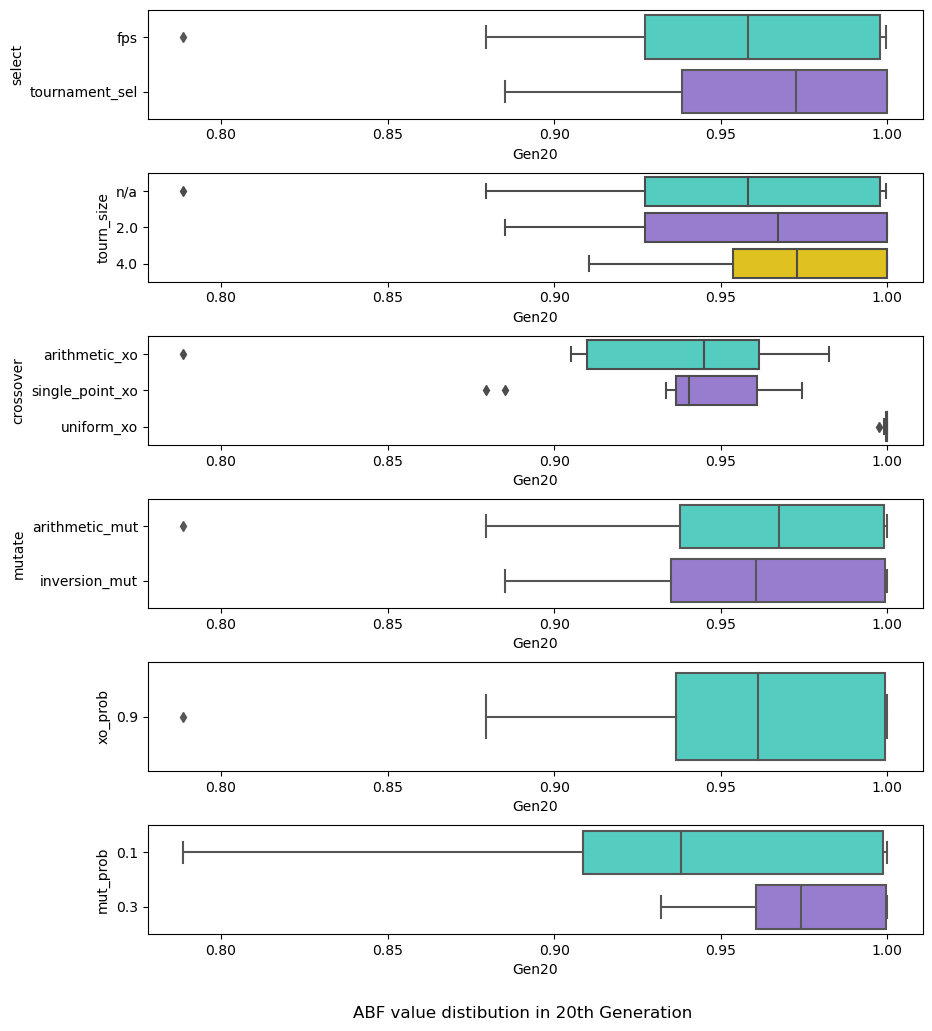

In [32]:
f, axes = plt.subplots(6, figsize = (10, 12))

# Define and set custom color palette
custom_palette = ["#40E0D0", "#9370DB", "#FFD700", "#00FF00", "#FF7F50"]
sns.set_palette(custom_palette)

sns.boxplot(x="Gen20", y="select", orient="h", data = merged_df, ax=axes[0])
sns.boxplot(x="Gen20", y="tourn_size", orient="h", data = merged_df, ax=axes[1])
sns.boxplot(x="Gen20", y="crossover", orient="h", data = merged_df, ax=axes[2])
sns.boxplot(x="Gen20", y="mutate", orient="h", data = merged_df, ax=axes[3])
sns.boxplot(x="Gen20", y="xo_prob", orient="h", data = merged_df, ax=axes[4])
sns.boxplot(x="Gen20", y="mut_prob", orient="h", data = merged_df, ax=axes[5])

plt.subplots_adjust(hspace=0.5) # adjusting subplot spacing
f.text(0.5, 0.04, "ABF value distibution in 20th Generation", ha="center", fontsize=12) # Set x-axis label for all subplots

plt.savefig("output_images/boxplot_comparison_results.png", dpi=300, bbox_inches='tight') 

plt.show() 

<hr>
<a class="anchor" id="finalresults">

## 4. Data from the final Results
    
</a>

<hr>
<a class="anchor" id="loadfinaloutput">

### 4.1 Loading data
    
</a>

In [28]:
# Loading output of GA algorithms from file
file_path = "output/final_comparison.csv"

results_final_df = pd.read_csv(file_path)
results_final_df.head()

,run_number,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,best_fitness_lst
0,1,30,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.3,2,"[0.37586668133735657, 0.37586668133735657, 0.6..."
1,2,30,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.3,2,"[0.5565666556358337, 0.6022833585739136, 0.624..."
2,3,30,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.3,2,"[0.4415166676044464, 0.4415166676044464, 0.558..."
3,4,30,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.3,2,"[0.43726667761802673, 0.600933313369751, 0.762..."
4,5,30,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.3,2,"[0.7886499762535095, 0.8385666608810425, 0.943..."


In [29]:
# Filling NaN values for 'torun_size' with "n/a" (will be useful for further grouping)
results_final_df = results_final_df.fillna({'tourn_size': 'n/a'})

# Convert string representation of arrays to actual arrays
results_final_df['best_fitness_lst'] = results_final_df['best_fitness_lst'].str.strip('[]').str.split(',').apply(lambda x: [float(val) for val in x])

<hr>
<a class="anchor" id="abffinal">

### 4.2 Calculating ABF(Average Best Fitness)
    
</a>

In [30]:
############## CALCULATING ABF ##############

# Grouping runs of a certain configuration
configuration_columns = ["total_runs", "pop_size", "gens", "select", "crossover", "mutate", 
                         "xo_prob", "mut_prob", "tourn_size"]

# Group by the specified columns and calculate the mean values of arrays
grouped_final_ave = results_final_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.mean(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result_final = grouped_final_ave.reset_index()
result_final = result_final.rename(columns={'best_fitness_lst': 'ABF'})

result_final.head()

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF
0,30,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.3,2,"[0.5630388865868251, 0.6360538870096206, 0.727..."
1,30,20,20,tournament_sel,single_point_co,inversion_mutation,0.9,0.3,4,"[0.6246461143096288, 0.720558891693751, 0.7819..."


<hr>
<a class="anchor" id="stdfinal">

### 4.3 Calculating Standard Deviations
    
</a>

In [31]:
############## CALCULATING Standard Deviations ##############

# Group by the specified columns and calculate the mean values of arrays
grouped_final_std = results_final_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.std(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result_final_std = grouped_final_std.reset_index()
result_final_std = result_final_std.rename(columns={'best_fitness_lst': 'std'})

# Merge result_std to result:
merged_final_df = pd.merge(result_final, result_final_std, on=configuration_columns, how='inner')
merged_final_df.head()

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,std
0,30,20,20,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.3,2,"[0.5630388865868251, 0.6360538870096206, 0.727...","[0.18158103499624506, 0.16397299628187817, 0.1..."
1,30,20,20,tournament_sel,single_point_co,inversion_mutation,0.9,0.3,4,"[0.6246461143096288, 0.720558891693751, 0.7819...","[0.1506162740254316, 0.13664911606170674, 0.11..."


<hr>
<a class="anchor" id="visualizingfinal">

## 5. Visualizing Final Results for different GA Configutation
    
</a>

<hr>
<a class="anchor" id="lineplotfinal">

### 5.1. Line Plot
    
</a>

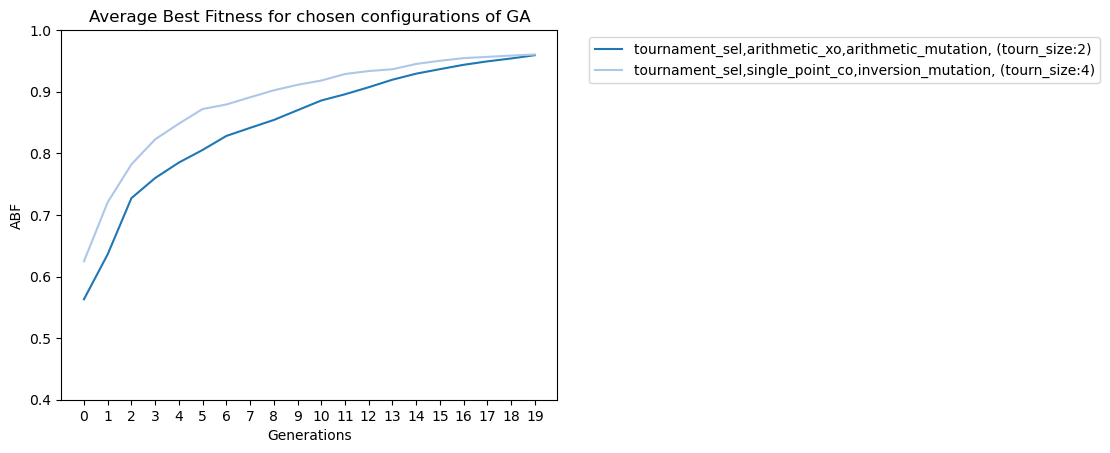

In [32]:
fig, ax = plt.subplots()

colormap = plt.colormaps['tab20']  # setting the colormap preference 

for index, row in merged_final_df.iterrows():
    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})',
            color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
ax.set_ylim([0.4, 1])
ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_title('Average Best Fitness for chosen configurations of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<hr>
<a class="anchor" id="lineplotstdfinal">

### 5.2. Line Plot with standard Desviation
    
</a>

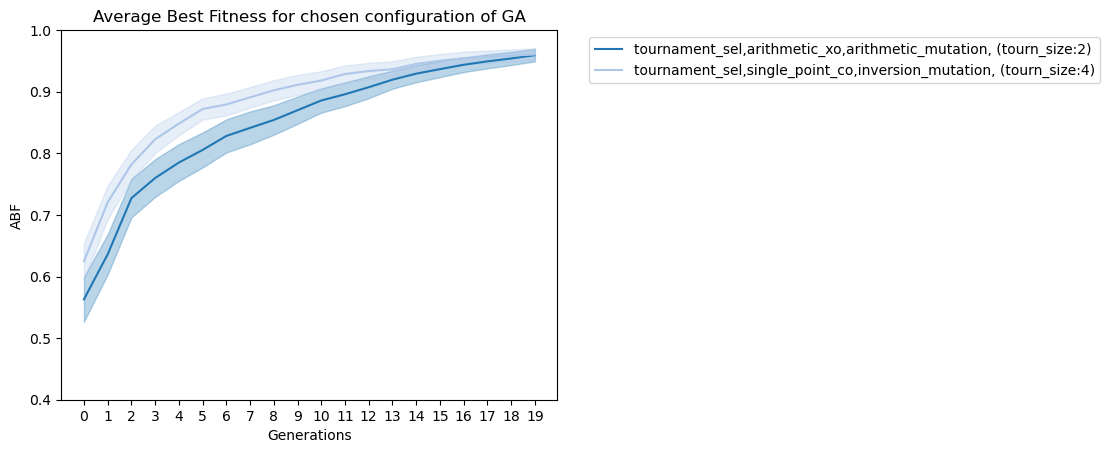

In [33]:
fig, ax = plt.subplots()

for index, row in merged_final_df.iterrows():
    upper_bound = row['ABF'] + 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2
    lower_bound = row['ABF'] - 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2

    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})',
            color=colormap(index % colormap.N))  # Assign a color from the colormap to each line plot
    ax.fill_between(range(len(row['ABF'])),lower_bound, upper_bound, alpha=0.3,
                    color=colormap(index % colormap.N))
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))

ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_ylim([0.4, 1])
ax.set_title('Average Best Fitness for chosen configuration of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<hr>
<a class="anchor" id="boxplotfinal">

### 5.3. BoxPlot for each configuration
    
</a>

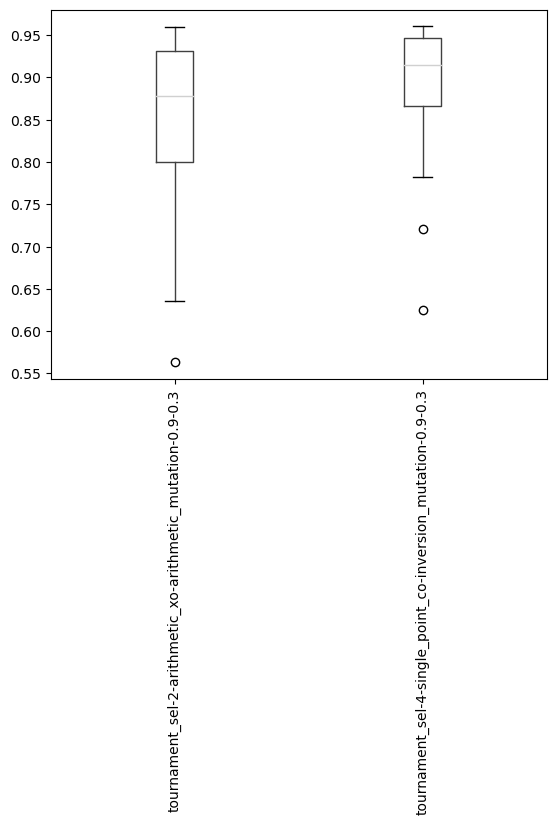

In [34]:
# To transform the dataframe into a new configuration:
merged_final_df['tourn_size'] = merged_final_df['tourn_size'].astype('string')
merged_final_df['xo_prob'] = merged_final_df['xo_prob'].astype('string')
merged_final_df['mut_prob'] = merged_final_df['mut_prob'].astype('string')

# Combine 'selection', 'crossover', 'mutate', 'xo_prob', 'mut_prob' and 'tourn_size' into one column
merged_final_df['combined'] = merged_final_df['select'] + '-' + merged_final_df['tourn_size'] + '-' + merged_final_df['crossover'] + '-' + merged_final_df['mutate'] + '-' + merged_final_df['xo_prob'] + '-' + merged_final_df['mut_prob'] 


# Initialize the new DataFrame
new_final_df = pd.DataFrame()

# For each unique combination, create a new column in the new DataFrame
for combo in merged_final_df['combined'].unique():
    # Get the 'ABF' values for this combination, reset the index, and drop the old index
    temp_final_df = merged_final_df.loc[merged_final_df['combined'] == combo, 'ABF'].apply(pd.Series).reset_index(drop=True)
    # Transpose the DataFrame so each value in 'ABF' becomes a separate row
    temp_df = temp_final_df.T
    # Add this DataFrame to the new DataFrame, using the combo as the column name
    new_final_df[combo] = temp_df[0]
    
new_final_df.boxplot()
plt.xticks(rotation='vertical')
plt.grid(False)
plt.show()

<hr>
<a class="anchor" id="boxplotgenfinal">

### 5.4. Boxplot across different generations
    
</a>

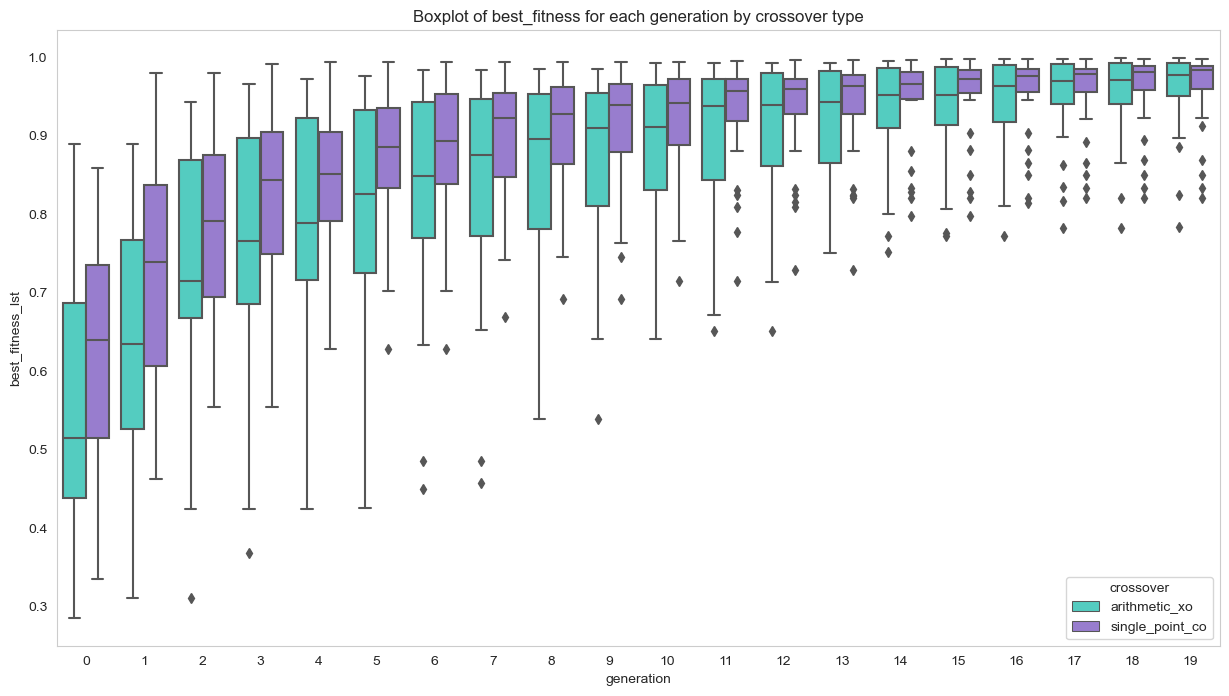

In [35]:
# boxplot visualizing the Best Fitness values across different generations, for the final configurations
results_final_df = results_final_df.explode('best_fitness_lst')
results_final_df['generation'] = results_final_df.groupby(['run_number', 'crossover']).cumcount()

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid", {'axes.facecolor': 'white', 'grid.color': '0.9'})
sns.boxplot(data=results_final_df, x='generation', y='best_fitness_lst', hue='crossover')
plt.title('Boxplot of best_fitness for each generation by crossover type')
plt.grid(False)
plt.show()